# Real or not disaster tweets



[Link Reto](https://www.kaggle.com/c/nlp-getting-started)


[base](https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners)

## Conect with Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Import packages

In [ ]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import os
os.chdir('/content/drive/Shared drives/Proyecto IA/str/')
import NLPtweet as tweet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load data and clean text

The module `NLPtweet` programing ownself, this containing diferent componets for proccess and analice tweets.

The `clean` fucntion remove special character like  *\x89Û¢*, expand the contractions; for explaple remplace *n't* for *not*, remove peunctuation, remove numbers, and convert the test to lower case.

In [ ]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
train['sms'] = train['text'].apply(lambda x : tweet.clean(x))
train.head(2)

id keyword  ... target                                                sms
0   1     NaN  ...      1  our deeds are the reason of this earthquake ma...
1   4     NaN  ...      1              forest fire near la ronge sask canada

[2 rows x 6 columns]

In [ ]:
train.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
print(train.sms.describe())

count                                                  7613
unique                                                 6920
top       watch this airport get swallowed up by a sands...
freq                                                     24
Name: sms, dtype: object


### Remove duplicates

We only like to wor with the text because this permitice than 

In [ ]:
sum(train.iloc[:,4:6].duplicated())

620

In [ ]:
train = train[train.iloc[:,4:6].duplicated() == False]
train[train['sms'].isin(list(train[train.iloc[:,5].duplicated()]['sms']))]

id  ...                                                sms
246     349  ...  us national park services tonto national fores...
248     353  ...  world annihilation vs self transformation  ali...
251     356  ...  us national park services tonto national fores...
269     390  ...  world annihilation vs self transformation  ali...
347     498  ...  one direction is my pick for  fan army directi...
...     ...  ...                                                ...
6837   9794  ...  hollywood movie about trapped miners released ...
7056  10110  ...  a look at state actions a year after fergusons...
7085  10147  ...  a look at state actions a year after fergusons...
7391  10576  ...  twia board approves  percent rate hike the tex...
7396  10583  ...  twia board approves  percent rate hike the tex...

[146 rows x 6 columns]

In [ ]:
train = train[train['sms'].isin(list(train[train.iloc[:,5].duplicated()]['sms'])) == False]
train.shape

(6847, 6)

In [ ]:
print(train[train['target'] == 1].shape, train[train['target'] == 0].shape)

(2801, 6) (4046, 6)


## Explore data

Compare lenght of the message

Text(0.5, 0, 'Message Length')

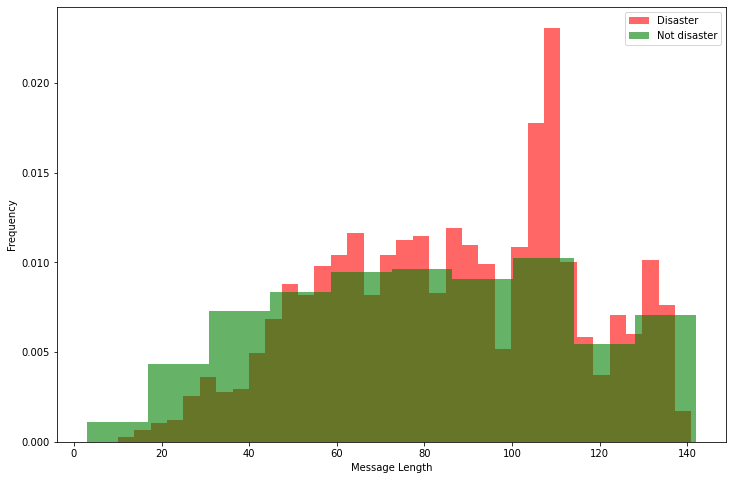

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].sms.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].sms.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

Compare words for Real or not diasas
ter

In [ ]:
print(tweet.Compare_most_common(tweet.concat(train[train.target==1], 'sms').split(),
                                tweet.concat(train[train.target==0], 'sms').split(), 150))

['the', 'in', 'a', 'of', 'to', 'is', 'and', 'on', 'for', 'i', 'at', 'it', 'from', 'that', 'not', 'by', 'are', 'was', 'with', 'fire', 'this', 'have', 'after', 'you', 'as', 'my', 'an', 'be', 'but', 'no', 'via', 'has', 'we', 'over', 'will', 'when', 'news', 'people', 'up', 'do', 'like', 'us', 'just', 'more', 'out', 'emergency', 'were', 'so', 'am', 'what', 'they', 'about', 'all', 'now', 'been', 'there', 'who', 'me', 'one', 'how', 'into', 'than', 'if', 'your', 'burning', 'video', 'he', 'off', 'had', 'or', 'man', 'get', 'first', 'would', 'some', 'new', 'our', 'could', 'down', 'still', 'time', 'may', 'today', 'back', 'say', 'world', 'its', 'can', 'her', 'being', 'their', 'day', 'here', 'rt']


remove_list = ["the", "a", "i", "to", "and", "of", "is",
               "in", "you", "my", "not", "for", "it", "on", "that",
               "with", "are", "out", "have", "be", "am", "this",
               "like", "by", "do", "me", "will", "so", "just","was",
               "your", "but", "at", "all", "up", "he", "from", "we",
               "they", "has", "or", "if", "as", "no", "what", "an",
               "now", "when", "one", "how", "there", "us","been",
               "via", "more", "people", "into", "who", "new",
               "emergency", "video", "after", "had", "over", "off"]
               
train['sms'] = train['sms'].apply(lambda x: tweet.remove(x, remove_list))

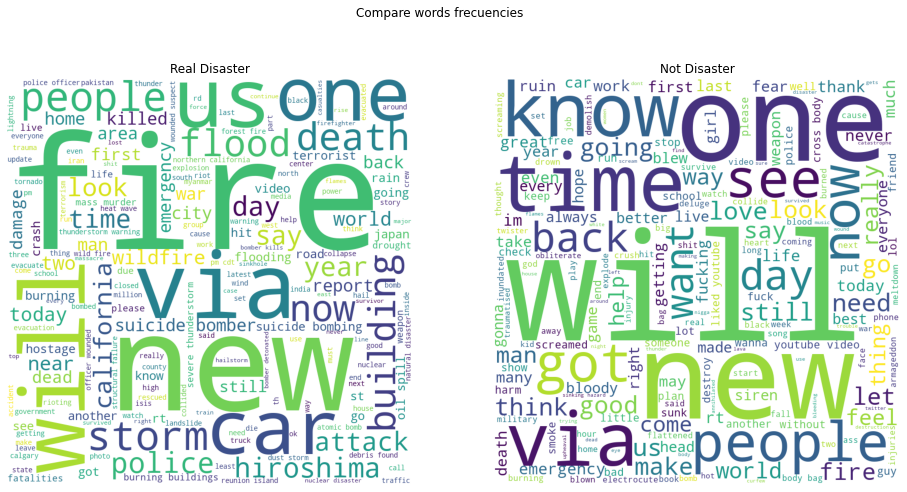

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'sms'),
                       tweet.concat(train[train['target'] == 0],'sms'))

## Other clean

In [ ]:
train['sms2'] = train['text'].apply(lambda x : tweet.clean2(x))

In [ ]:
from collections import Counter
w = Counter(tweet.concat(train, 'sms2').split())
w1 = Counter(tweet.concat(train[train.target==1], 'sms2').split())
w0 = Counter(tweet.concat(train[train.target==0], 'sms2').split())
print("total:    ", w.most_common)
print("real:     ", w1.most_common)
print("not real: ", w0.most_common)

total:     <bound method Counter.most_common of Counter({'fire': 184, 'people': 138, 'emergency': 129, 'new': 121, 'news': 109, 'video': 104, 'off': 103, 'police': 102, 'body': 100, 'nuclear': 91, 'disaster': 90, 'burning': 89, 'buildings': 88, 'time': 86, 'storm': 86, 'still': 85, 'crash': 83, 'dead': 82, 'man': 80, 'world': 80, 'down': 78, 'fires': 75, 'ca': 74, 'know': 74, 'killed': 74, 'see': 72, 'attack': 70, 'suicide': 70, 'life': 69, 'war': 69, 'make': 67, 'mass': 67, 'car': 66, 'say': 66, 'california': 65, 'pm': 65, 'train': 65, 'accident': 64, 'bomb': 64, 'home': 63, 'hiroshima': 62, 'way': 60, 'love': 60, 'old': 55, 'help': 54, 'good': 54, 'collapse': 54, 'let': 54, 'bombing': 53, 'take': 51, 'getting': 50, 'school': 50, 'rt': 50, 'look': 49, 'city': 49, 'via': 49, 'think': 49, 'death': 48, 'damage': 47, 'full': 47, 'coming': 46, 'please': 46, 'right': 46, 'during': 46, 'work': 46, 'hit': 45, 'forest': 45, 'need': 44, 'weather': 44, 'watch': 44, 'army': 43, 'floods': 43, 'wre

the idea is that the model aren't dependent from the place, for that are most util for any twitter, for this we remove the words that localice the tweet in a particular place

In [ ]:
sector_list = ["california", "#japan", "japan", "island", "calgary", "obama", "malaysia",
"american", "turkey", "iran", "virgin", "india", "china", "pakistan", "fedex",
"alabama", "israeli", "libya", "washington", "brithish", "new york", "russia",
"japanese", "indian", "saipan", "rusian", "nigerian", "colorado", "france",
"texas", "oklahoma", "canada", "pakisstani", "israel", "palestinian", "malaysian",
"madhya", "philippines", "hawaii", "french", "udhampur", "gaza", "australia", "arabia",
"mediterranean", "mexico", "brazil", "newyork", "nyc", "italy", "yyc", "fukushima",
"afghanistan", "nashville", "usagov", "chinese", "iraq", 
"chicago", "denver", "mansehra", "pakistan", "portland",  "vietnam", "enugu", "georgia",
"turkish"]


train["sms2"] = train["sms2"].apply(lambda x: tweet.remove(x, sector_list))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus2 = tweet.corpus(train, 'sms2')
vect  = CountVectorizer()
x2     = vect.fit_transform(corpus2)
X2 = vect.transform(train['sms2'])
X2.shape[1]

13818

now we remove the words that repeat less than 5 times

In [ ]:
remov = []
for key in w.keys(): 
  if w[key] < 5:
    remov.append(key)
print(remov)
train["sms2"] = train["sms2"].apply(lambda x: tweet.remove(x, remov))

['deeds', 'forgiveforest', 'ronge', 'sask', 'canadaresidents', 'helter', 'notified', 'receive', 'californiasent', 'ruby', 'pours', 'schoolrockyfire', 'directions', 'cafire', 'wildfiresflood', 'manitou', 'springs', 'areastop', 'woodsemergency', 'streetafraid', 'areapeople', 'farhaha', 'tampa', 'flooded', 'hah', 'fvck', 'floodingraining', 'tampabay', 'countflood', 'bago', 'bagodamage', 'multi', 'breakingmanlove', 'fruitssummer', 'lovelycar', 'fastgoooooooaaaaaalridiculouslondon', 'coollove', 'skiingwonderfulloooooolway', 'shitnyc', 'weeklove', 'girlfriendcoooolpastawholesale', 'ablazetry', 'rtafricanbaze', 'nigeria', 'abacrying', 'ablazeplus', 'ablazemufc', 'hype', 'acquisitions', 'doubt', 'epl', 'seasoninec', 'abia', 'ablazebarbados', 'bridgetown', 'jamaica', 'santa', 'elizabeth', 'superintendeablaze', 'lordcheck', 'nsfwablaze', 'deadawesome', 'visiting', 'cfc', 'ancop', 'tita', 'vida', 'caresoooo', 'pumped', 'ablazewanted', 'preaching', 'hotelgained', 'stats', 'growwest', 'alonebuildin

Text(0.5, 0, 'Message Length')

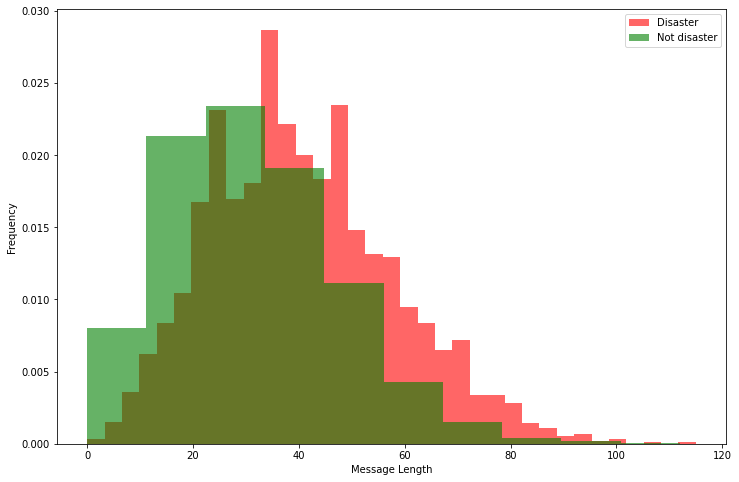

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].sms2.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].sms2.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

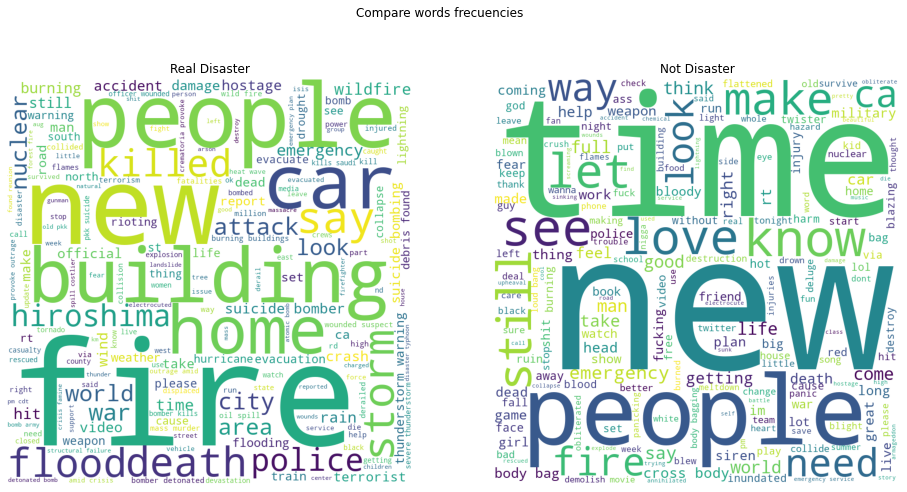

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'sms2'),
                       tweet.concat(train[train['target'] == 0],'sms2'))

# web componets

In [ ]:
train["web_comp"] = train['text'].apply(lambda x : tweet.extract_web_comp(x))
train.head(2)

id keyword  ...                             sms2     web_comp
0   1     NaN  ...  reason earthquake allah forgive  #earthquake
1   4     NaN  ...                   forest fire la             

[2 rows x 8 columns]

Text(0.5, 0, 'Message Length')

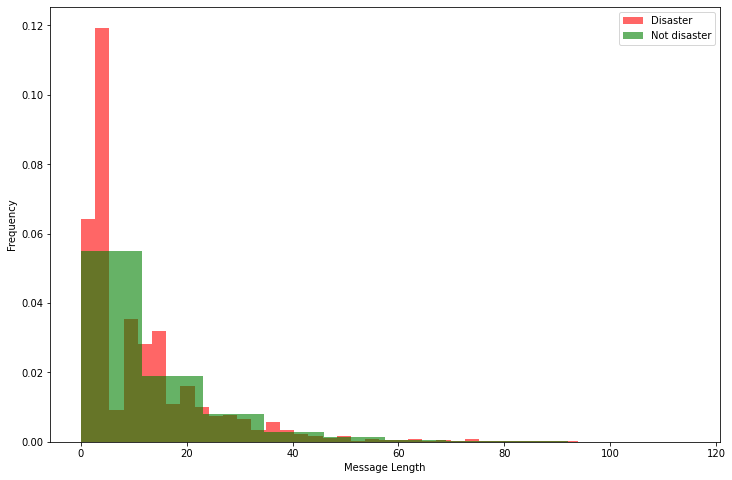

In [ ]:
plt.figure(figsize=(12, 8))
train[train.target==1].web_comp.apply(len).plot(bins=35, kind='hist', color='red', 
                                       label='Disaster', alpha=0.6, density=1)
train[train.target==0].web_comp.apply(len).plot(kind='hist', color='green', 
                                       label='Not disaster', alpha=0.6,density=1)
plt.legend()
plt.xlabel("Message Length")

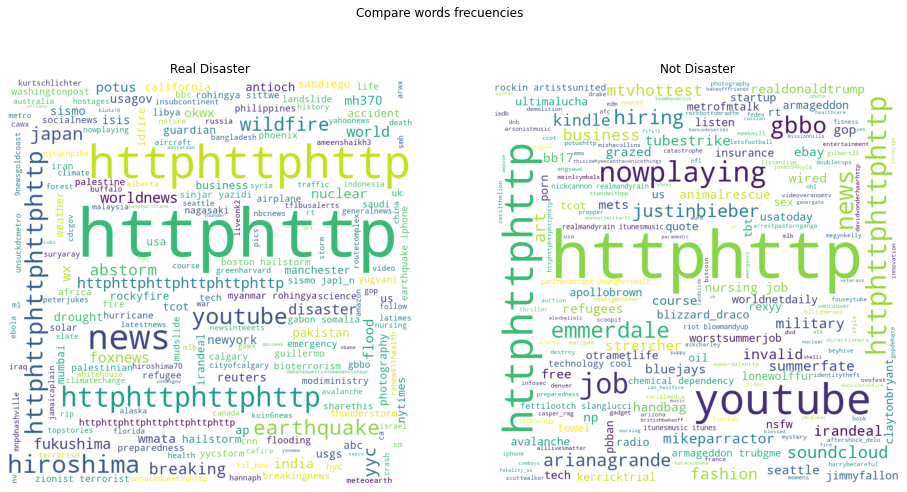

In [ ]:
tweet.plot_wordsclouds(tweet.concat(train[train['target'] == 1],'web_comp'),
                       tweet.concat(train[train['target'] == 0],'web_comp'))

## Metric

In [ ]:
def metric(X, y, estimator = None, ypred = None):
  from sklearn.metrics import precision_score, recall_score
  if estimator:
    ypred = estimator.predict(X)
  pre = precision_score(y, ypred)
  rec = recall_score(y, ypred)
  val = 2* (pre*rec)/(pre+rec)
  return val

### Bag of Words (BOW)

We based in metodology post by [freeCodeCamp](https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/) and finaly used [scikit](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Whit sms1
corpus = tweet.corpus(train, 'sms')
vect  = CountVectorizer()
x     = vect.fit_transform(corpus)
X = vect.transform(train['sms'])
y = train['target'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#with sms2
corpus2 = tweet.corpus(train, 'sms2')
vect  = CountVectorizer()
x2     = vect.fit_transform(corpus2)
X2 = vect.transform(train['sms2'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#with sms2
corpus3 = tweet.corpus(train, "web_comp")
vect  = CountVectorizer()
x3     = vect.fit_transform(corpus2)
X3 = vect.transform(train["web_comp"])

In [ ]:
print("corpus 1: %s corpus 2: %s corpus 3: %s" % (X.shape[1], X2.shape[1], X3.shape[1] ))

corpus 1: 16757 corpus 2: 4282 corpus 3: 4282


## Emmbeding

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
Z = embed(train['sms'].values)
Z.shape

TensorShape([6847, 512])

In [ ]:
Z2 = embed(train['sms2'].values)
Z2.shape

TensorShape([6847, 512])

In [ ]:
Z3 = embed(train["web_comp"].values)
Z3.shape

TensorShape([6847, 512])

## [PCA](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)
select the corpus whit best performance 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) 
pca1 = pca.fit_transform(X.toarray())
pca2 = pca.fit_transform(X2.toarray())
pca3 = pca.fit_transform(X3.toarray())

## Evalute model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
clf1 = RandomForestClassifier(max_depth=3, random_state=0)
clf2 = RandomForestClassifier(max_depth=6, random_state=0)
clf3 = RandomForestClassifier(max_depth=12, random_state=0)
svc1 = SVC(gamma=0.3)
svc2 = SVC(gamma=0.5)
svc3 = SVC(gamma=0.7)
est = [clf1, clf2, clf3, svc1, svc2, svc3]
ts_ppt = np.arange(.1, .9, .1)

In [ ]:
data = {'model':[],
        'estimator': [],
        'train':[],
        'mean_tr':[],
        'sd_tr':[],
        'mean_ts':[],
        'sd_ts':[],
        'p1': [],
        'encodding': [],
        'clean': []
        }

In [ ]:
#Analisis with bow and sms
data = tweet.learning_data(enc = 'bow', clean = 1, data = data, estimators=est, X=X, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)
#Analisis with emb edding and sms
data = tweet.learning_data(enc = 'embedding', clean = 1, data = data, estimators=est, X=Z.numpy(), y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("modelos.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
#Analisis with bow and sms2
data = tweet.learning_data(enc = 'bow', clean = 2, data = data, estimators=est, X=X2, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)
#Analisis with emb edding and sms
data = tweet.learning_data(enc = 'embedding', clean = 2, data = data, estimators=est, X=Z2.numpy(), y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
#Analisis with bow and Web componets
data = tweet.learning_data(enc = 'bow', clean = 3, data = data, estimators=est, X=X3, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)
#Analisis with emb edding and Web componets
data = tweet.learning_data(enc = 'embedding', clean = 3, data = data, estimators=est, X=Z3.numpy(), y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
#Analisis with pca1
data4 = tweet.learning_data(enc = 'bow_pca', clean = 1, data = data, estimators=est, X=pca1, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)
#Analisis with pca2
data4 = tweet.learning_data(enc = 'bow_pca', clean = 2, data = data, estimators=est, X=pca2, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)
#Analisis with pca2
data4 = tweet.learning_data(enc = 'bow_pca', clean = 3, data = data, estimators=est, X=pca3, y=y, test_size=ts_ppt,
              scoring=metric, iters=5, train_sizes=None)
with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)

In [ ]:
with open("../data/datos.pkl", 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df["bias"] = df.mean_tr - df.mean_ts
df

model  ...      bias
0    RandomForestClassifier  ...       NaN
1    RandomForestClassifier  ...  0.007101
2    RandomForestClassifier  ...  0.000065
3    RandomForestClassifier  ...  0.008139
4    RandomForestClassifier  ...       NaN
..                      ...  ...       ...
474                     SVC  ...  0.016923
475                     SVC  ...  0.012689
476                     SVC  ...  0.030989
477                     SVC  ...  0.030161
478                     SVC  ...  0.048539

[479 rows x 11 columns]

## Bow and sms

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'bow']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... encodding
17  RandomForestClassifier  ...       bow

[1 rows x 9 columns]

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'bow']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... encodding
24   SVC  ...       bow

[1 rows x 9 columns]

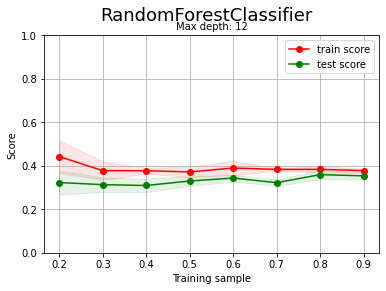

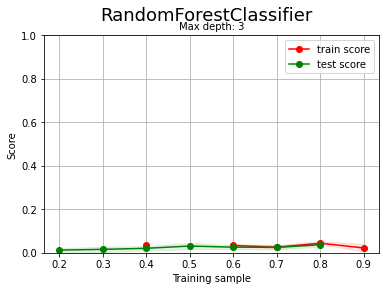

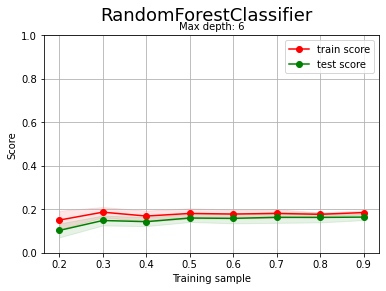

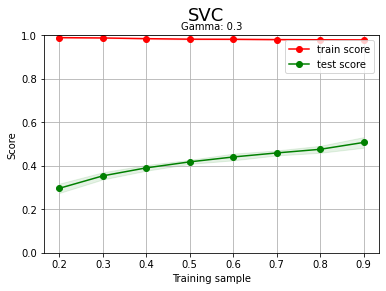

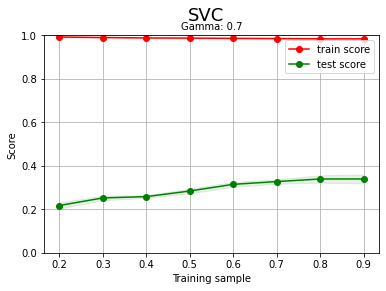

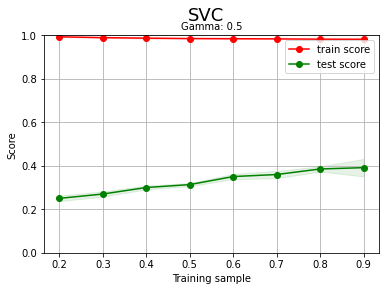

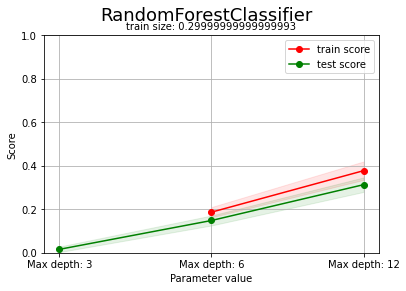

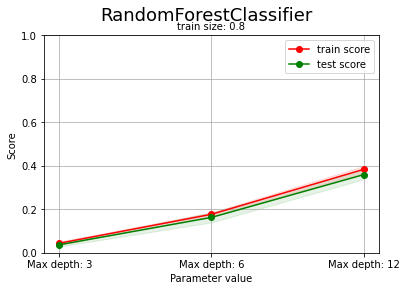

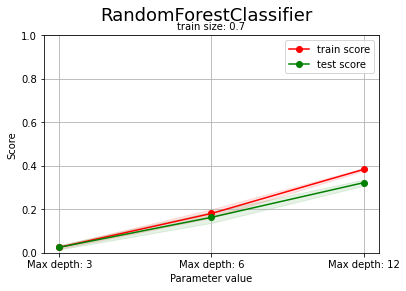

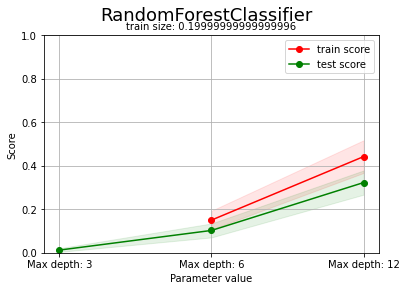

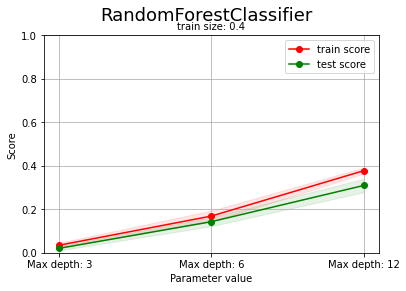

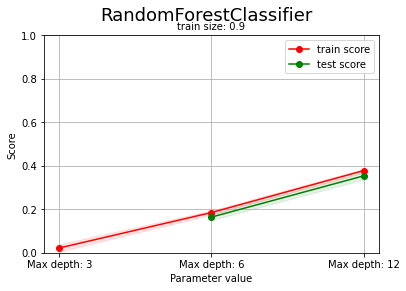

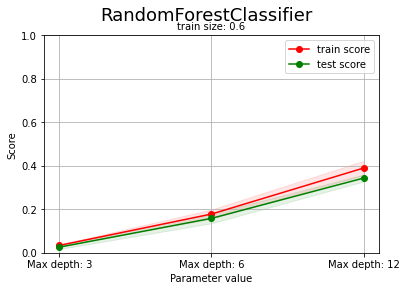

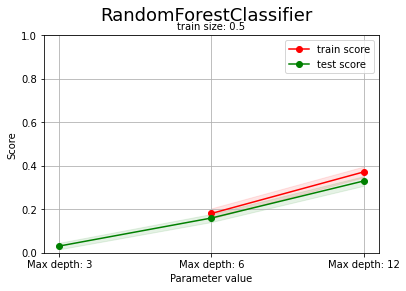

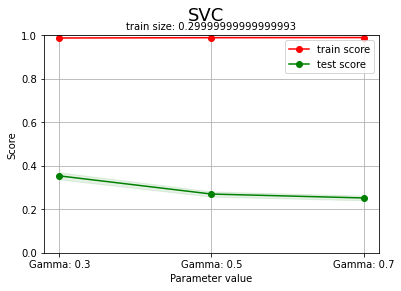

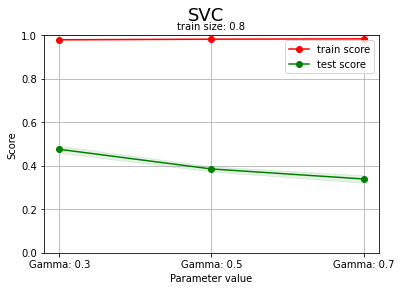

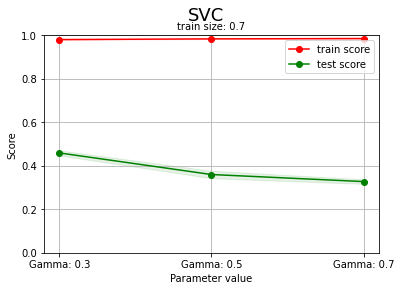

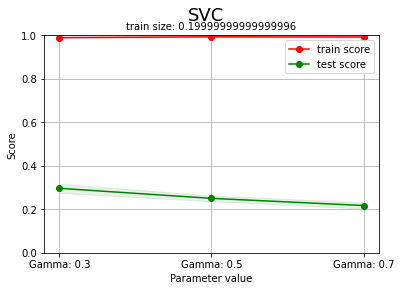

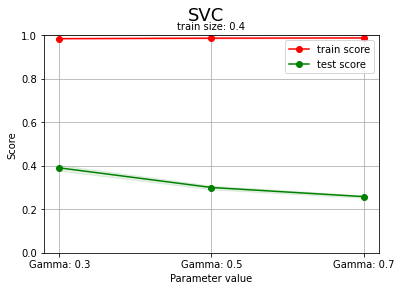

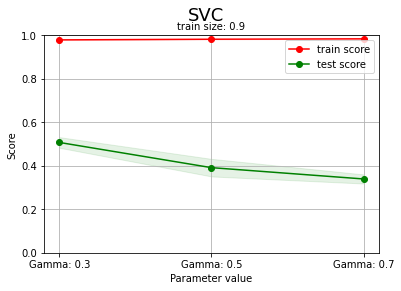

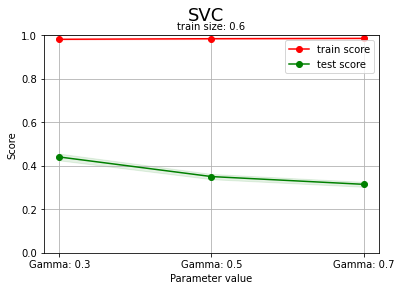

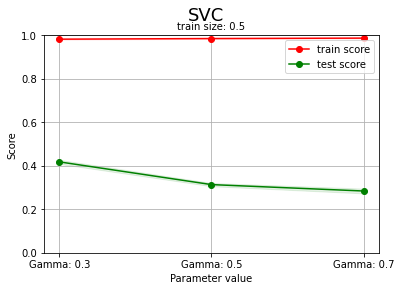

In [ ]:
d = df[df.clean == 1]
d = df[df.encodding == 'bow']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## Embedding and sms

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'embedding']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ...  encodding
65  RandomForestClassifier  ...  embedding

[1 rows x 9 columns]

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'embedding']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ...  encodding
80   SVC  ...  embedding

[1 rows x 9 columns]

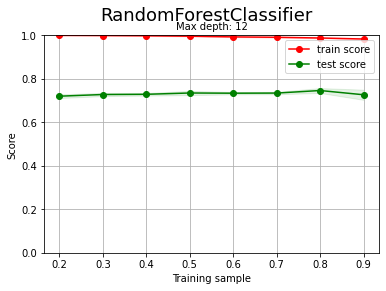

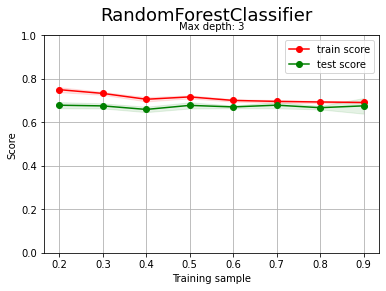

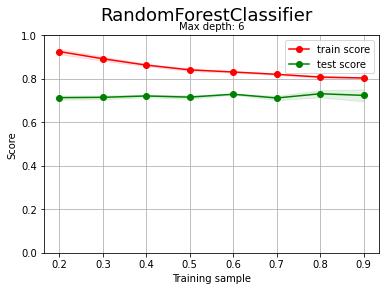

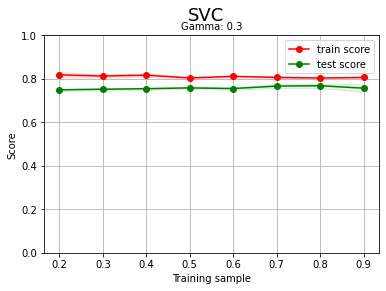

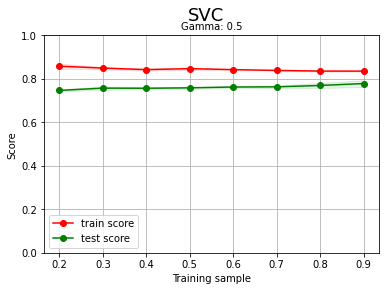

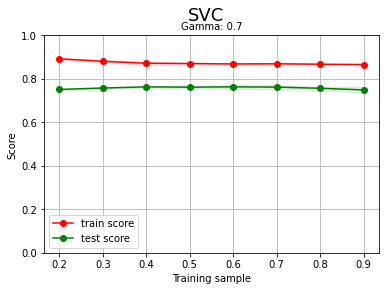

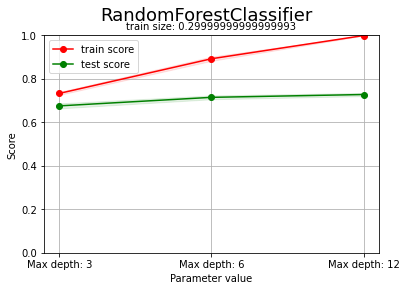

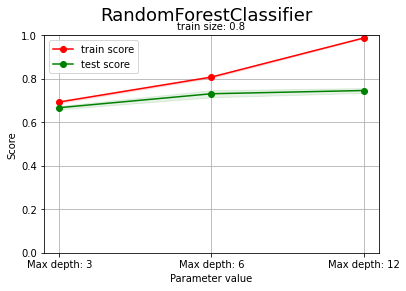

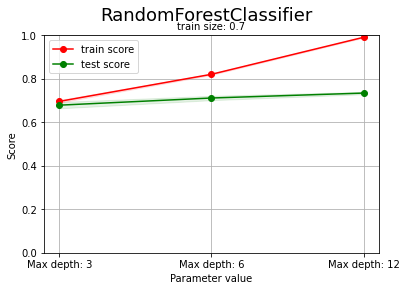

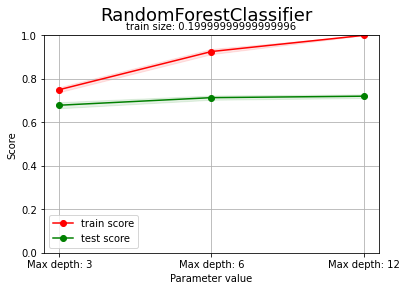

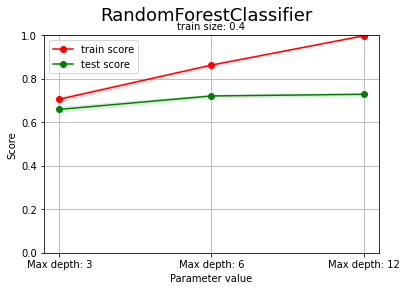

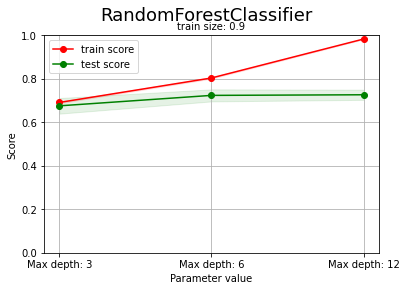

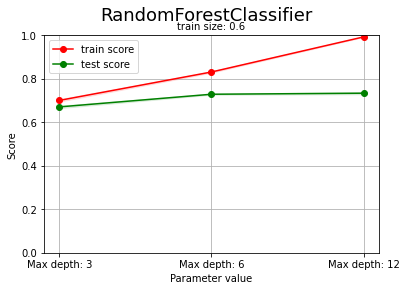

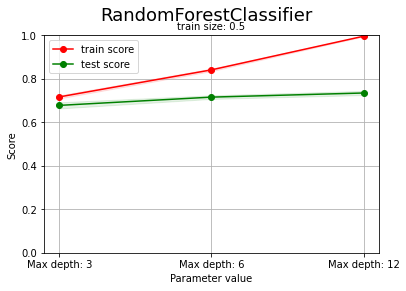

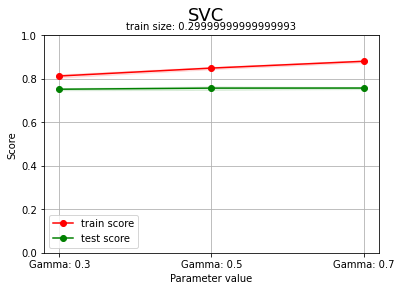

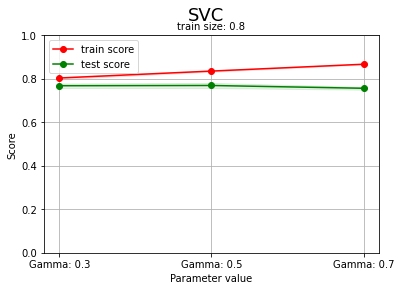

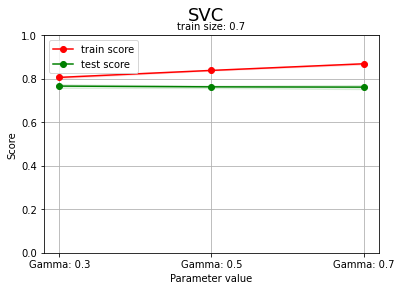

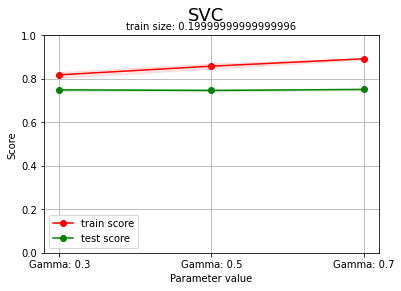

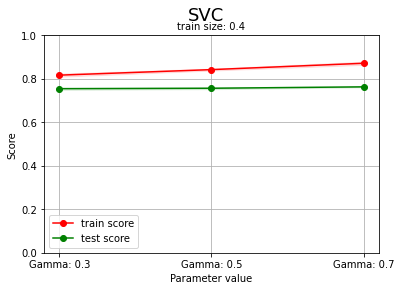

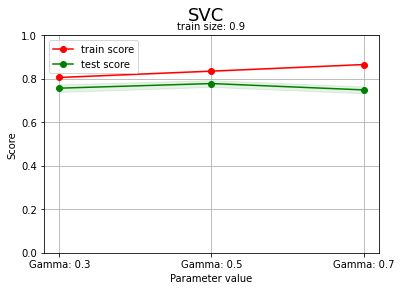

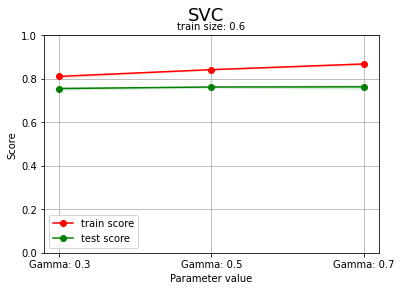

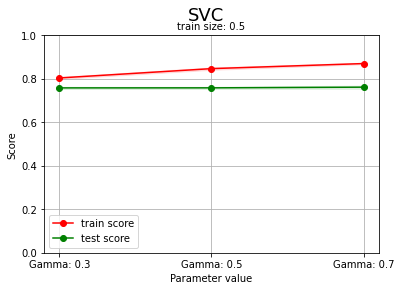

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'embedding']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## bow and sms2

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... encodding
17  RandomForestClassifier  ...       bow

[1 rows x 9 columns]

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... encodding
24   SVC  ...       bow

[1 rows x 9 columns]

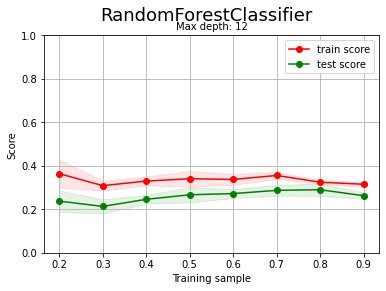

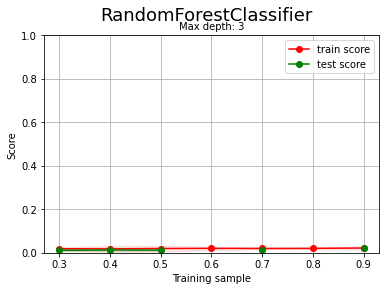

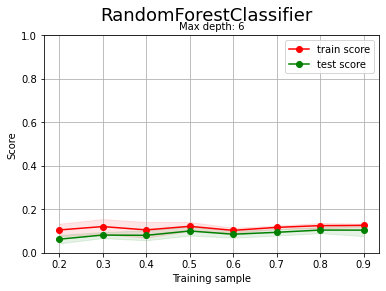

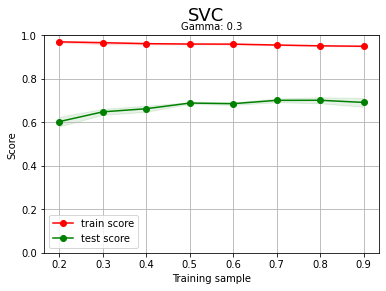

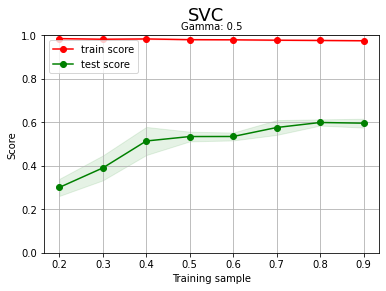

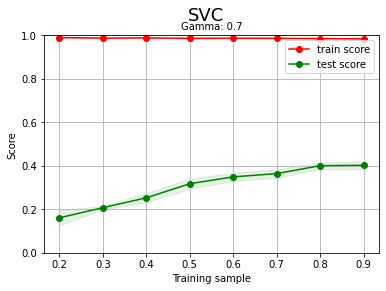

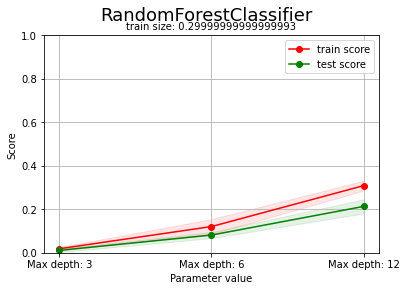

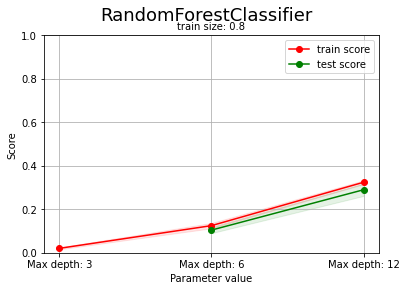

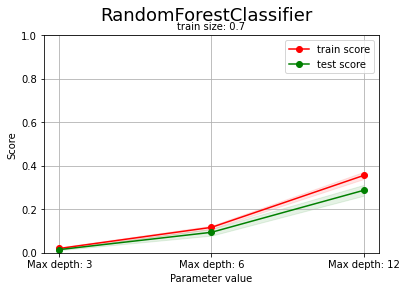

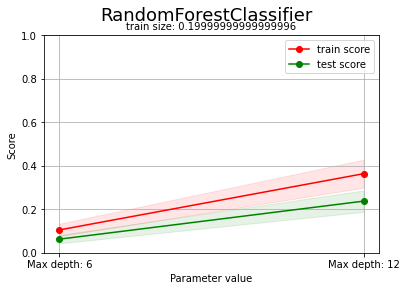

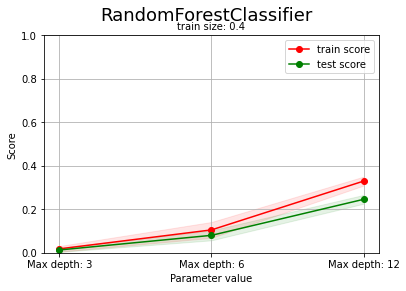

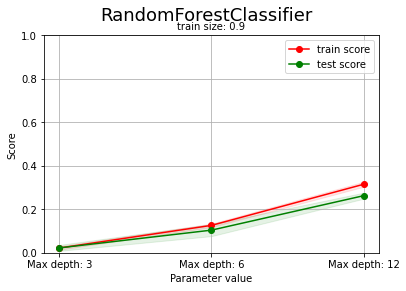

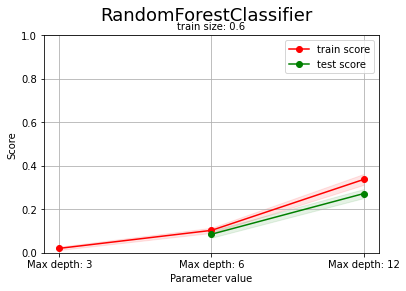

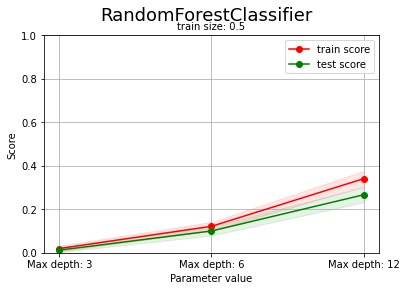

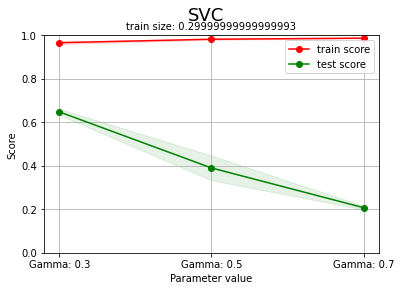

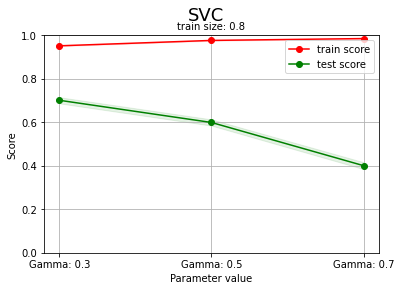

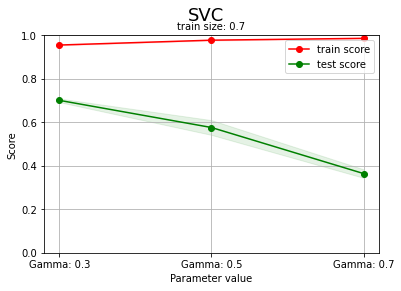

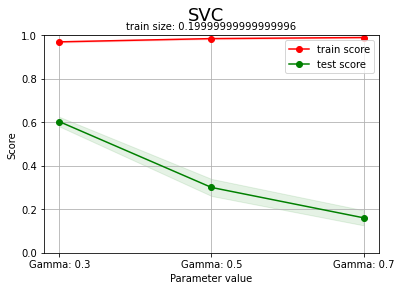

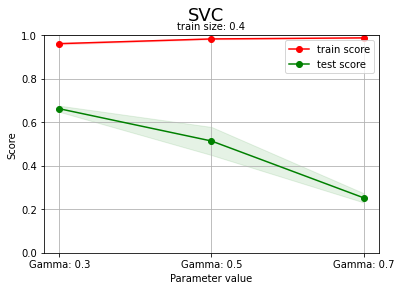

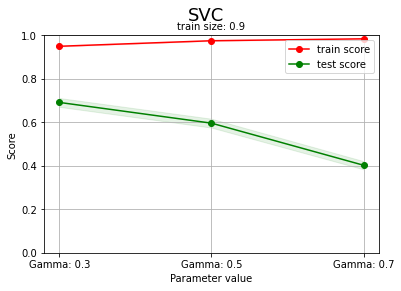

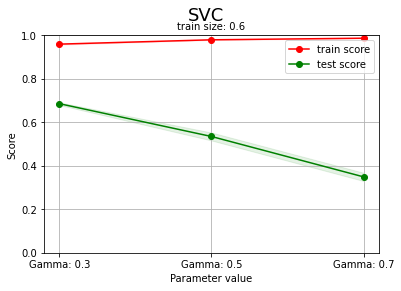

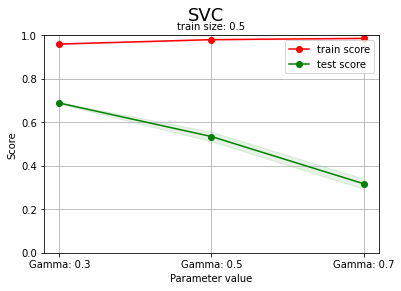

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## encodding and sms2



In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'embedding']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ...  encodding
64  RandomForestClassifier  ...  embedding

[1 rows x 9 columns]

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'embedding']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ...  encodding
73   SVC  ...  embedding

[1 rows x 9 columns]

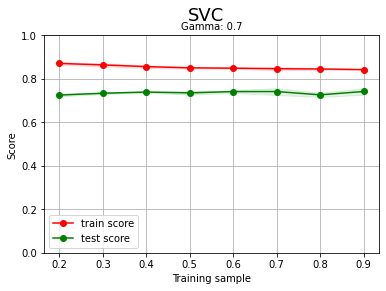

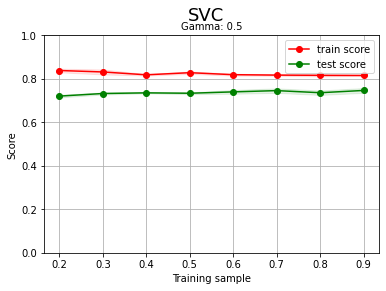

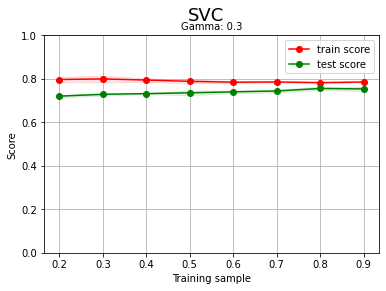

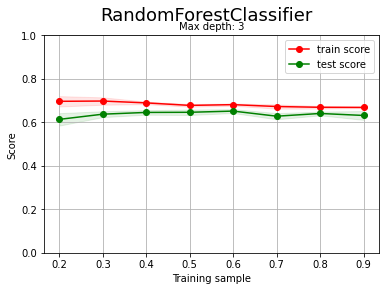

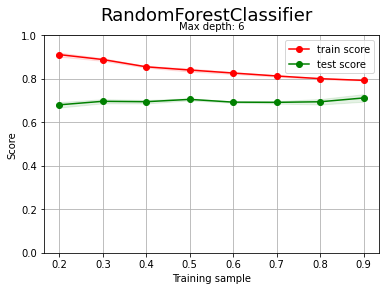

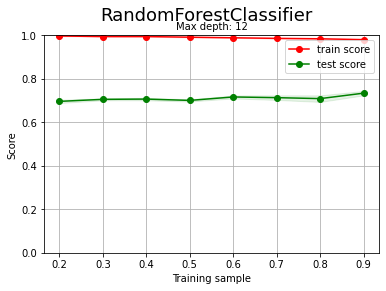

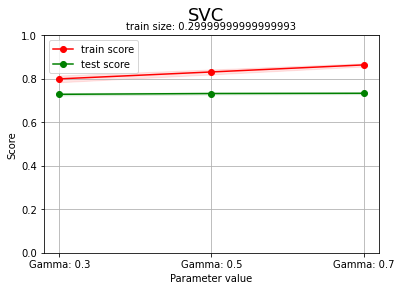

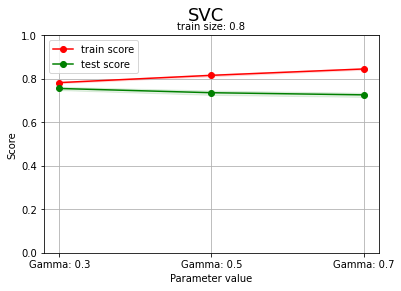

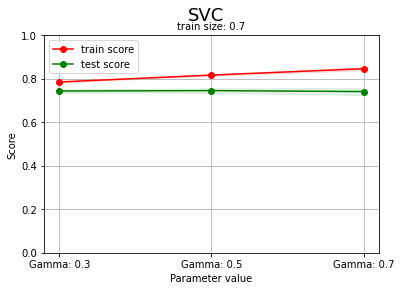

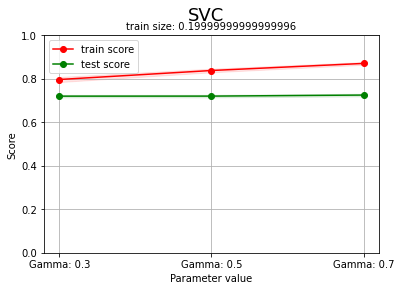

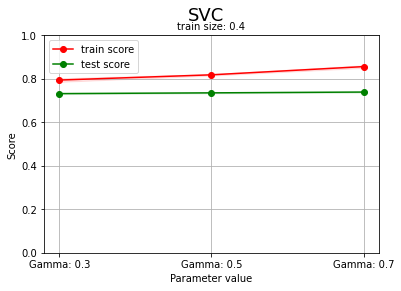

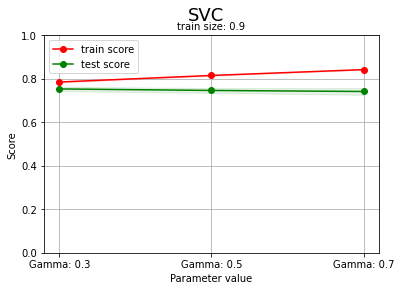

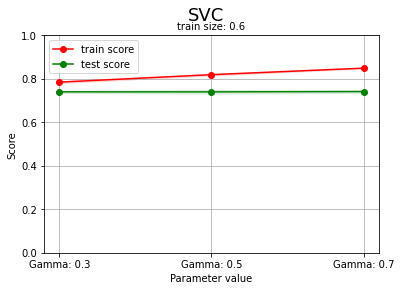

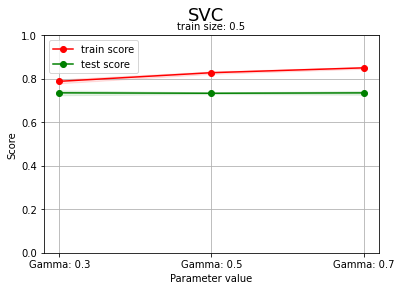

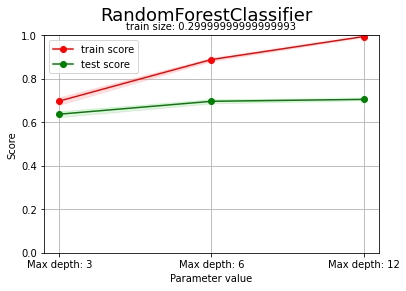

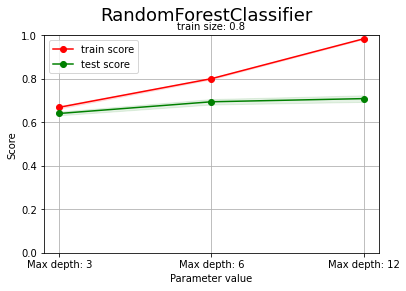

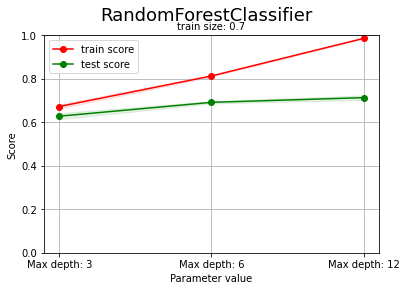

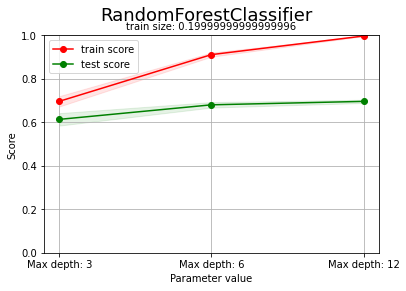

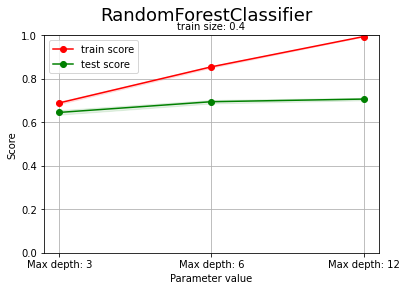

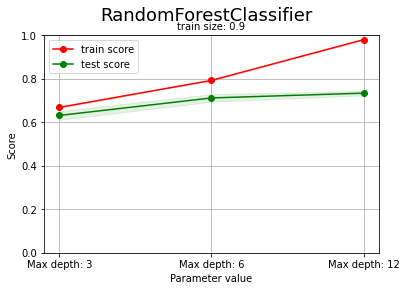

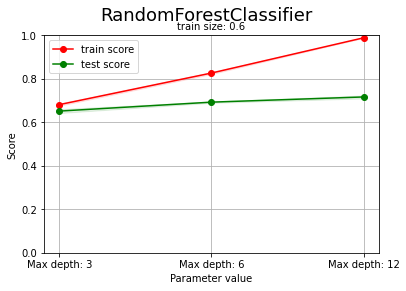

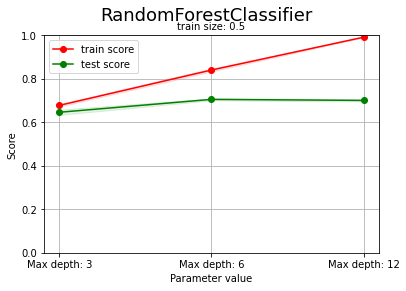

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'embedding']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## bow and web_componets

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... clean
209  RandomForestClassifier  ...     3

[1 rows x 10 columns]

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model                                          estimator  ...  encodding  clean
281   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...        bow      3

[1 rows x 10 columns]

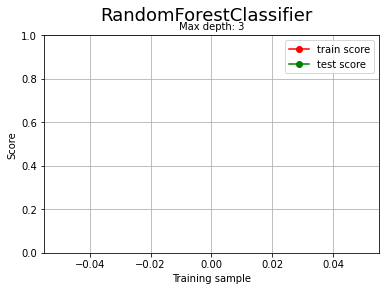

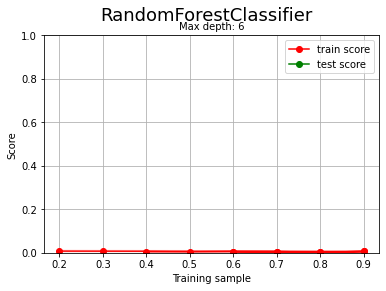

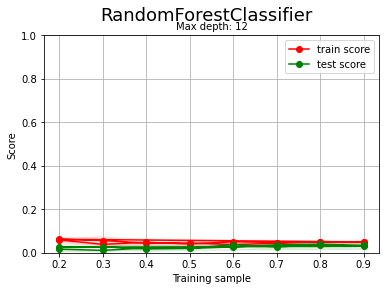

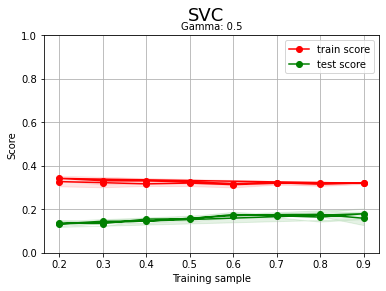

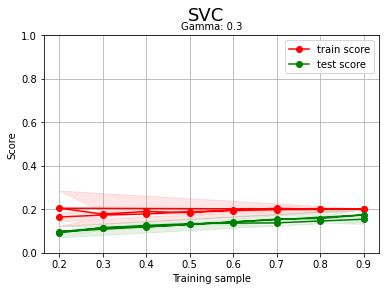

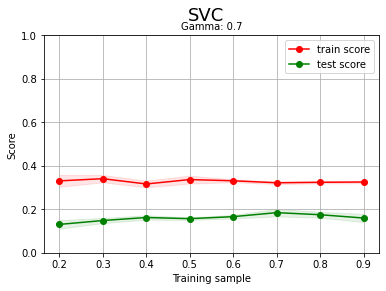

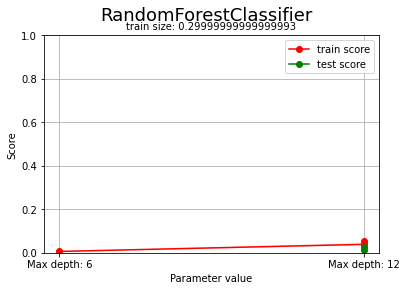

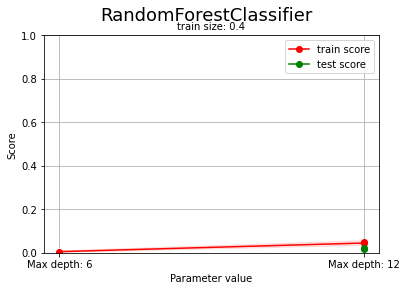

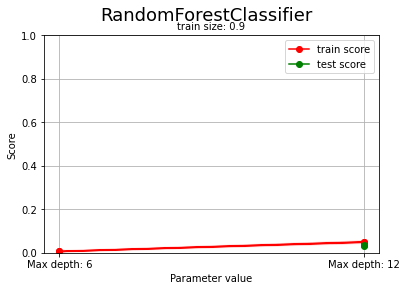

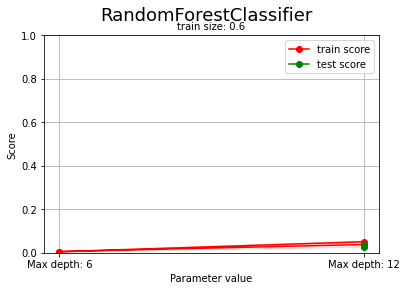

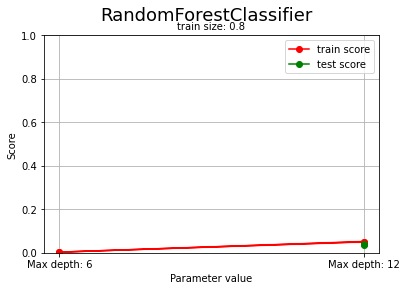

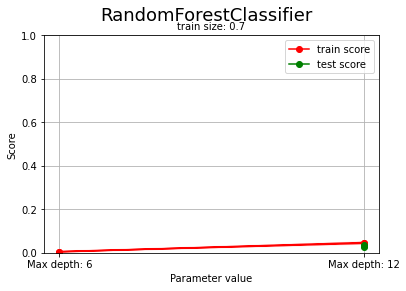

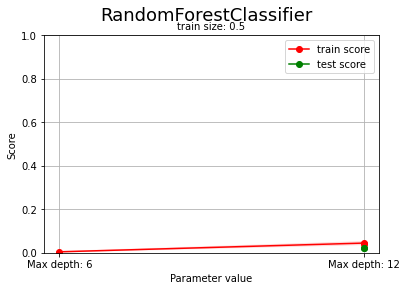

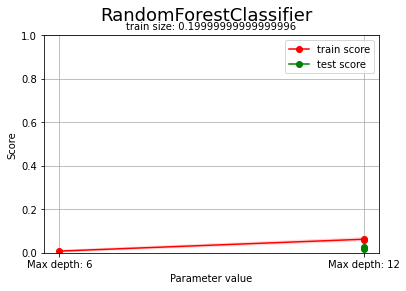

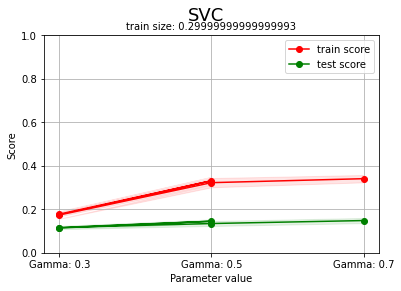

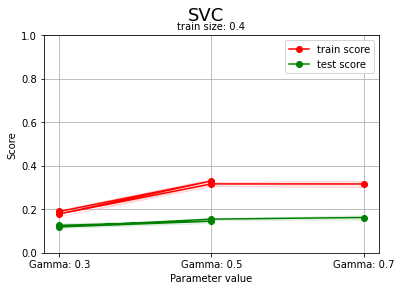

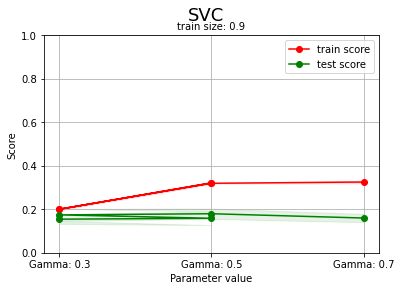

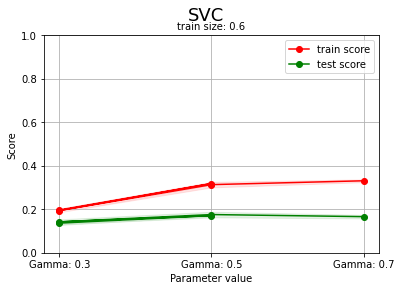

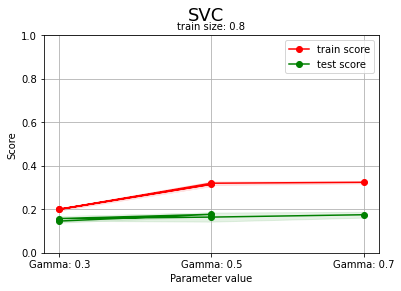

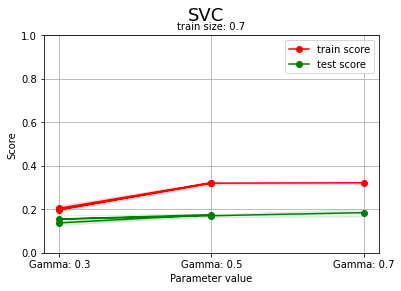

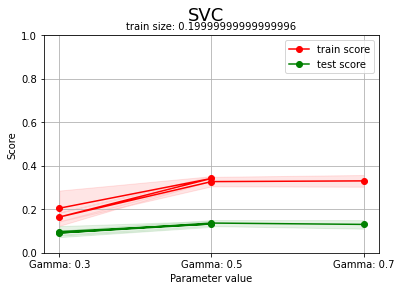

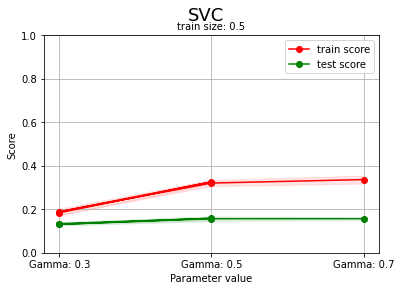

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## Embedding and web componets


In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'embedding']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ...      bias
287  RandomForestClassifier  ...  0.014149

[1 rows x 11 columns]

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'embedding']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model                                          estimator  ...  clean      bias
312   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...      3  0.010733

[1 rows x 11 columns]

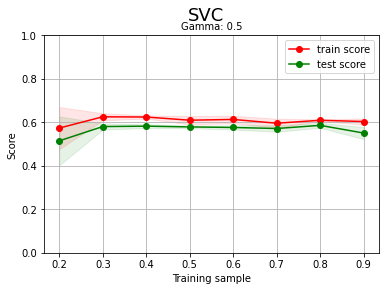

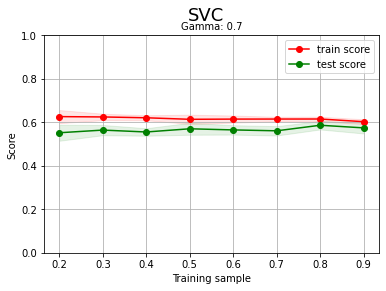

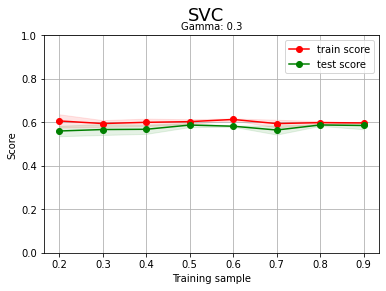

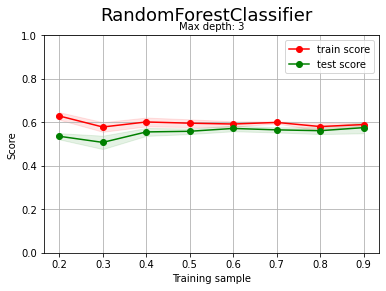

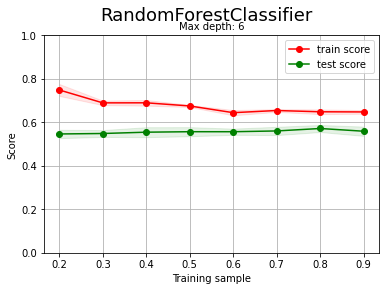

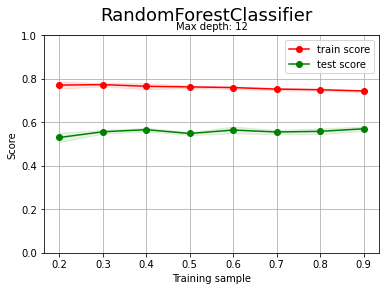

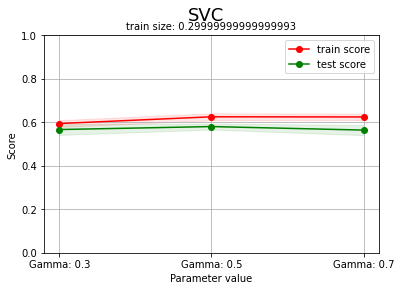

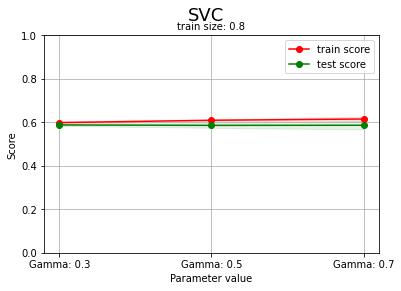

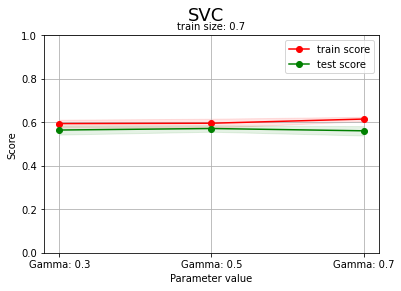

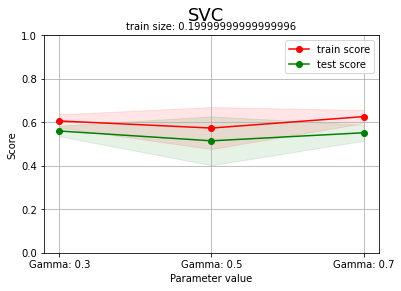

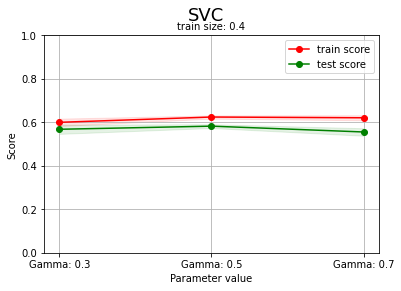

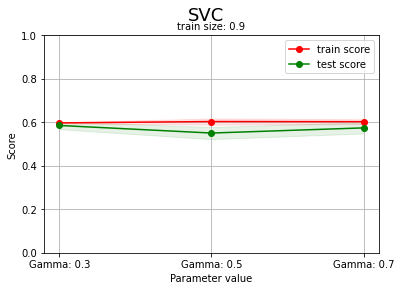

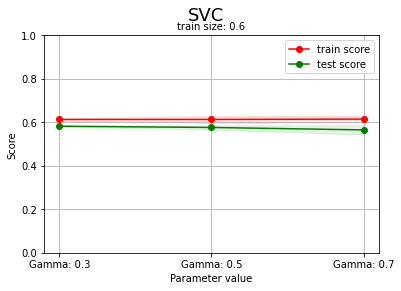

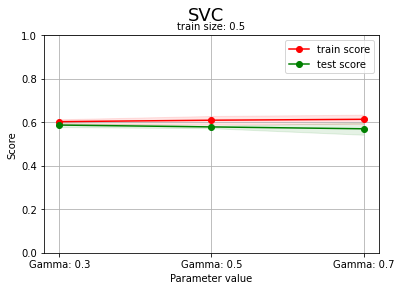

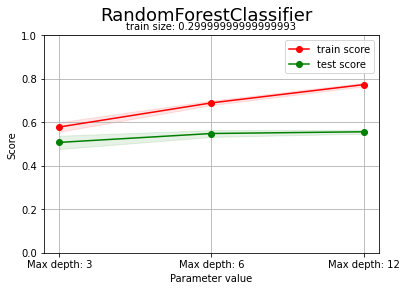

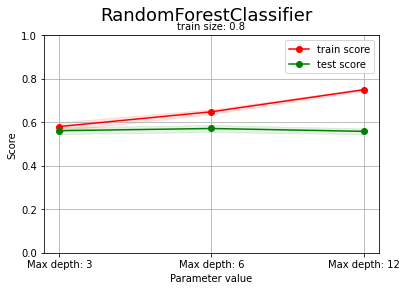

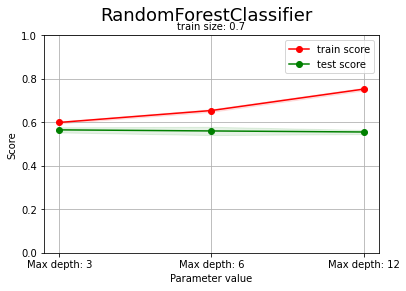

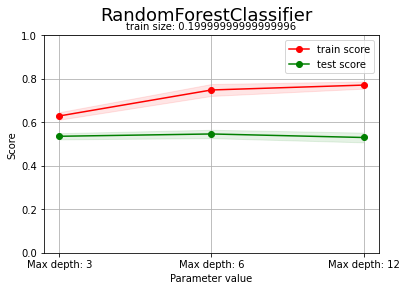

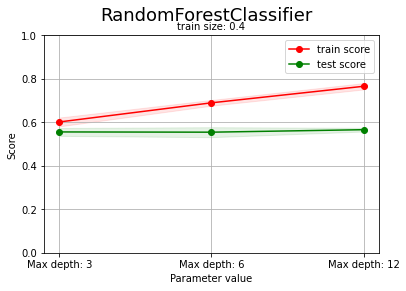

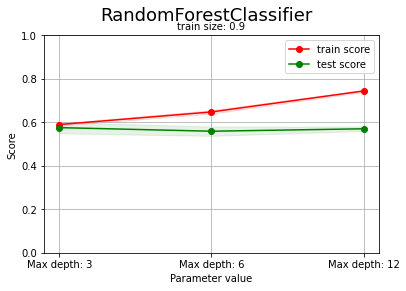

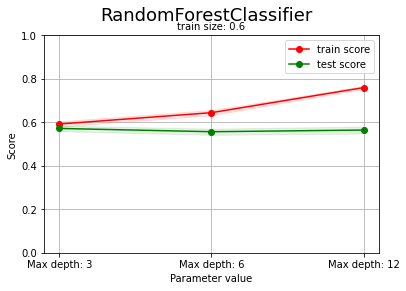

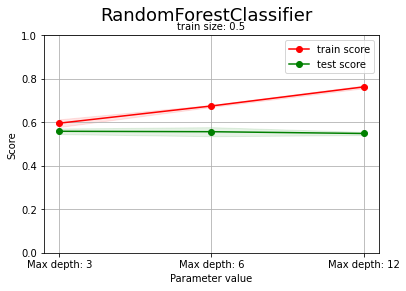

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'embedding']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

### PCA 1

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... clean
351  RandomForestClassifier  ...     1

[1 rows x 10 columns]

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model                                          estimator  ...  encodding  clean
359   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...    bow_pca      1

[1 rows x 10 columns]

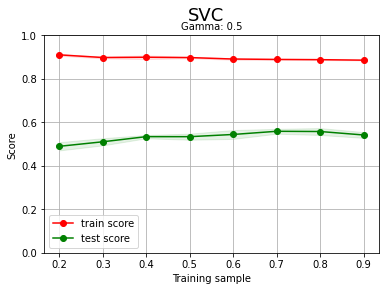

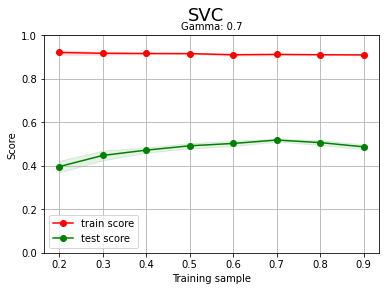

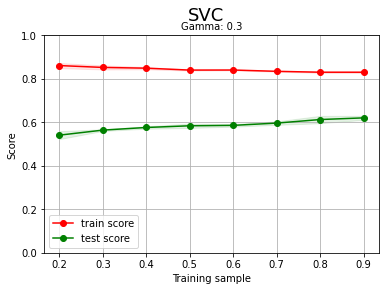

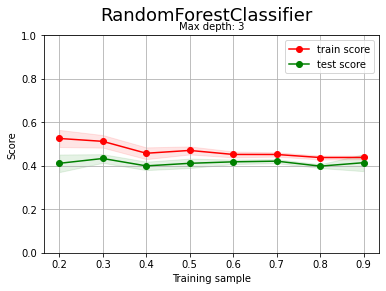

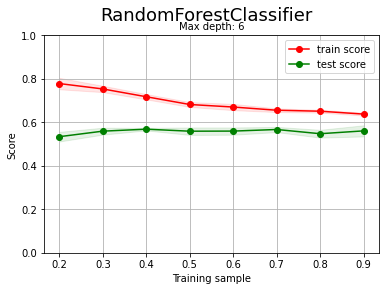

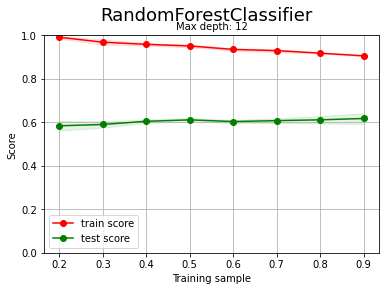

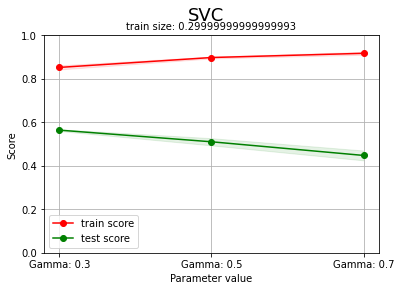

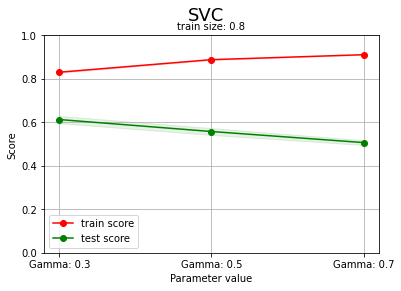

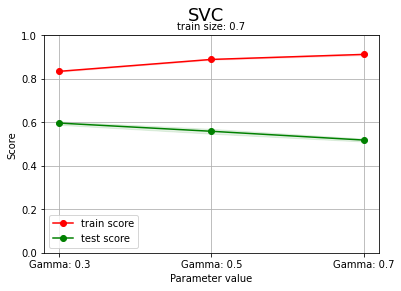

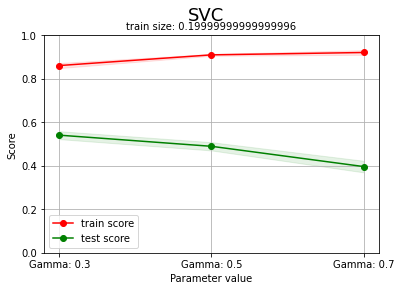

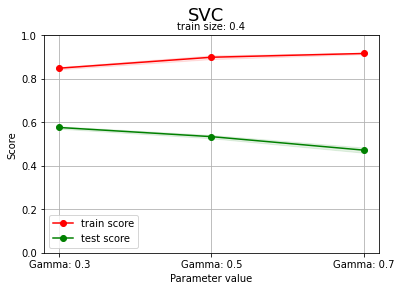

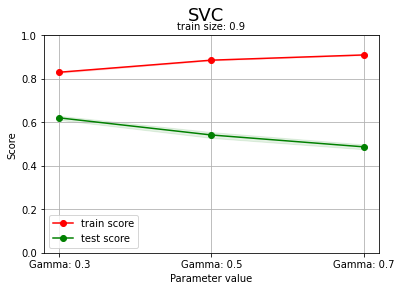

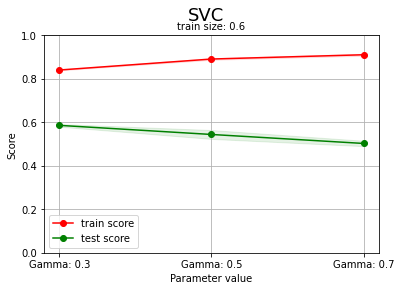

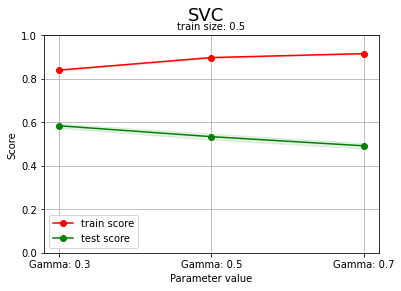

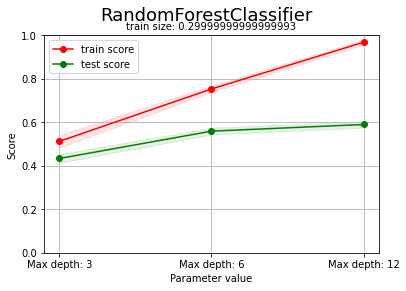

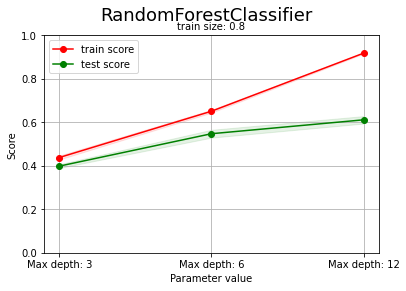

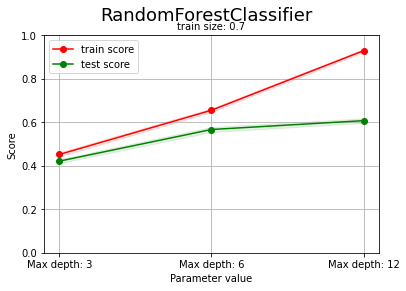

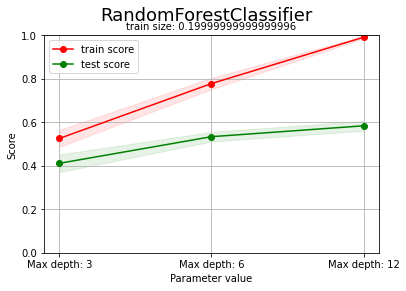

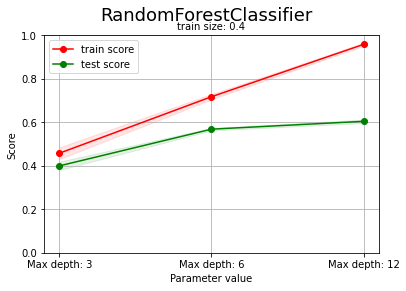

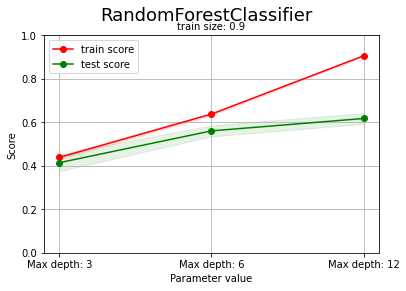

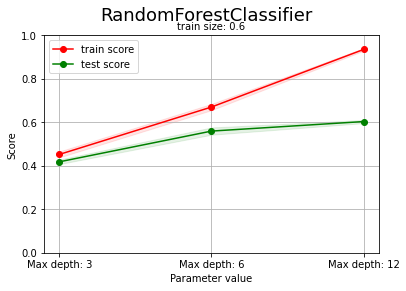

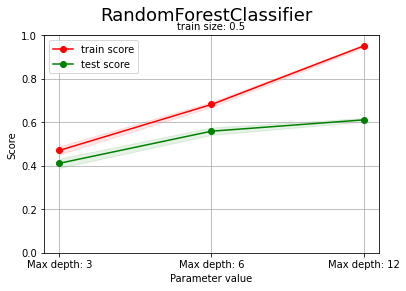

In [ ]:
d = df[df.clean == 1]
d = d[d.encodding == 'bow_pca']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## PCA 2

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... clean
399  RandomForestClassifier  ...     2

[1 rows x 10 columns]

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model                                          estimator  ...  encodding  clean
415   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...    bow_pca      2

[1 rows x 10 columns]

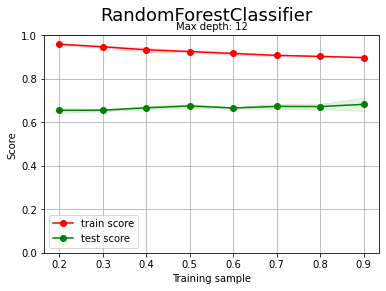

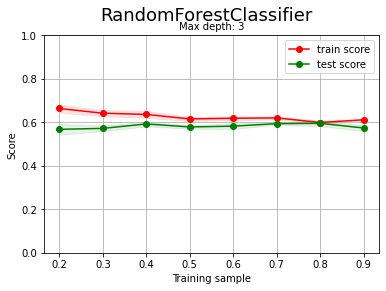

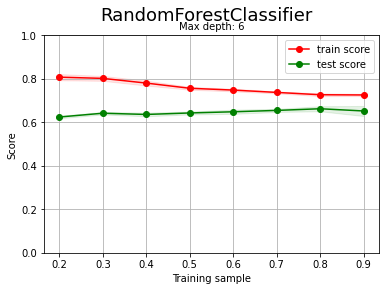

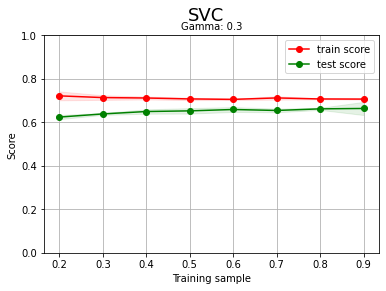

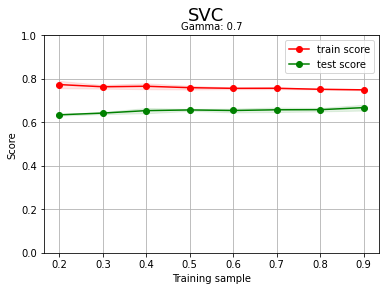

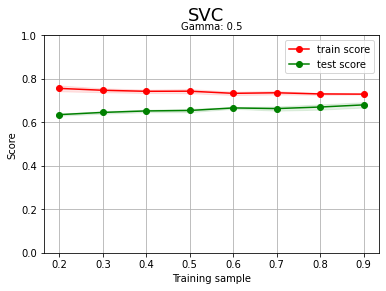

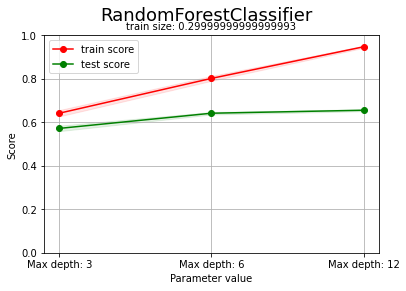

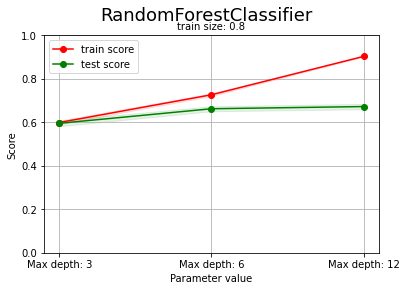

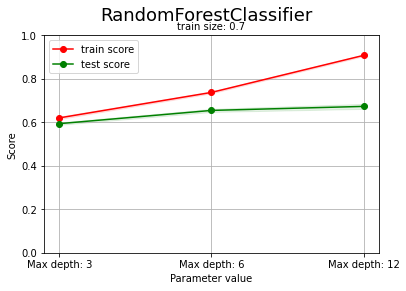

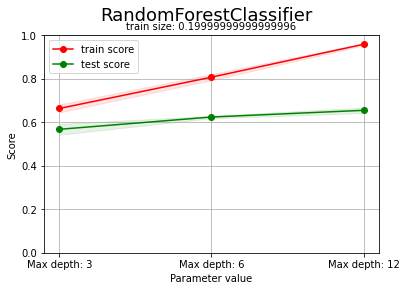

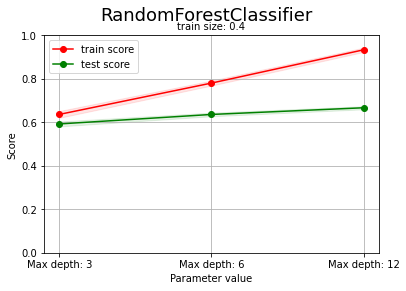

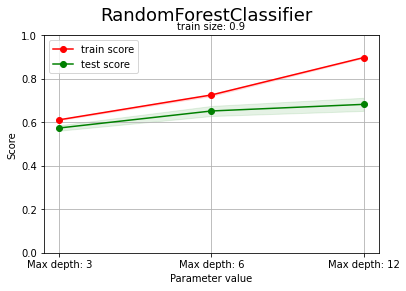

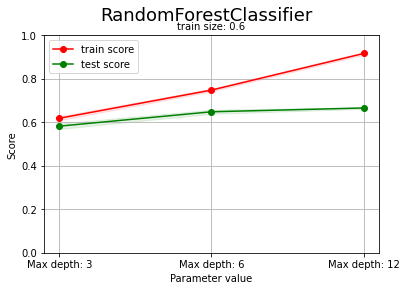

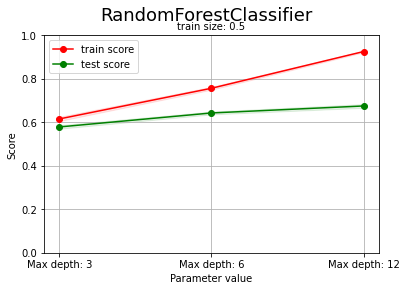

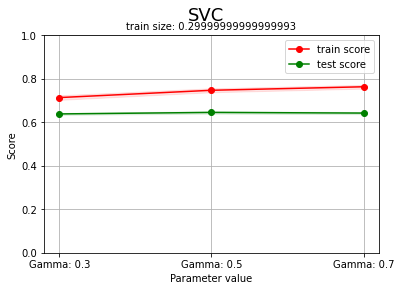

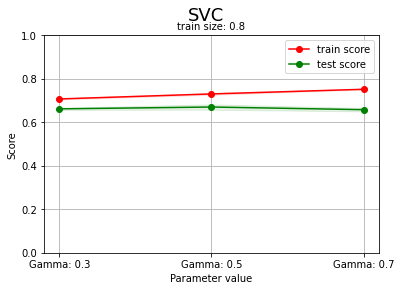

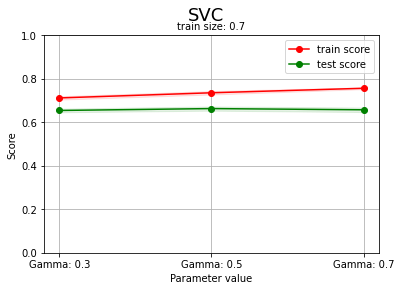

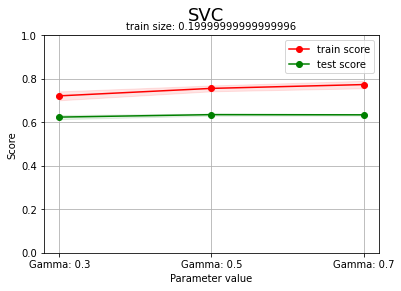

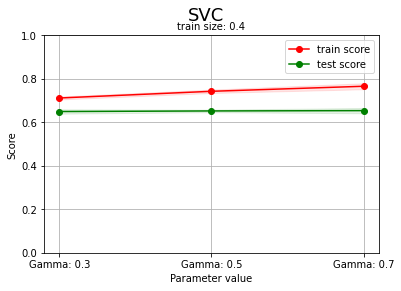

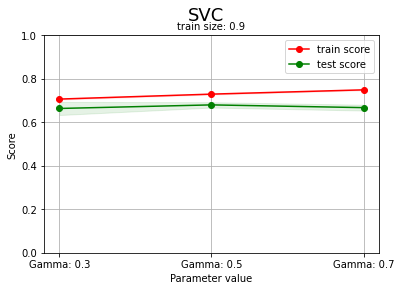

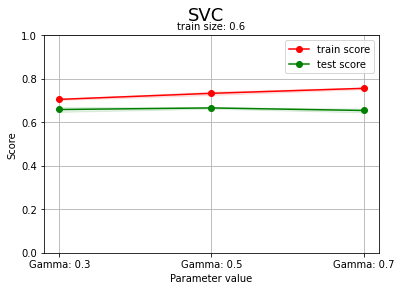

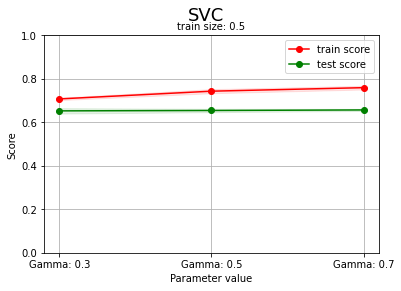

In [ ]:
d = df[df.clean == 2]
d = d[d.encodding == 'bow_pca']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

## PCA 3

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "RandomForestClassifier"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model  ... clean
448  RandomForestClassifier  ...     3

[1 rows x 10 columns]

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow_pca']
d = d[d.model == "SVC"]
d = d[np.isnan(d.mean_ts) == False]
d[d.mean_ts == max(d.mean_ts)]

model                                          estimator  ...  encodding  clean
464   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...    bow_pca      3

[1 rows x 10 columns]

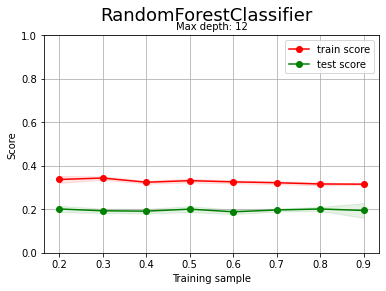

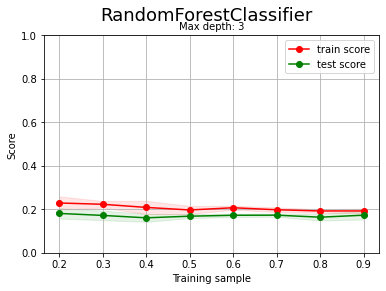

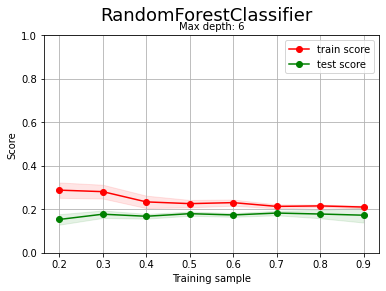

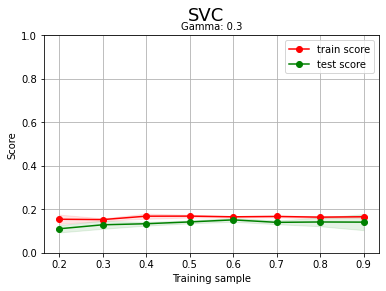

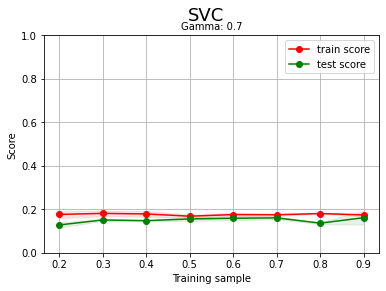

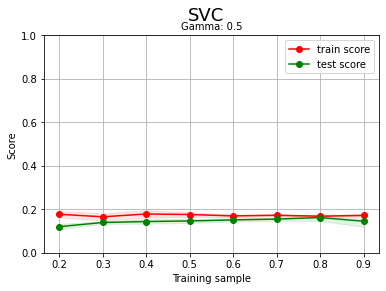

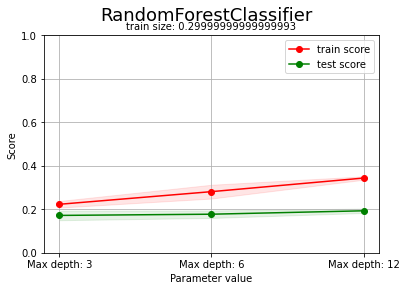

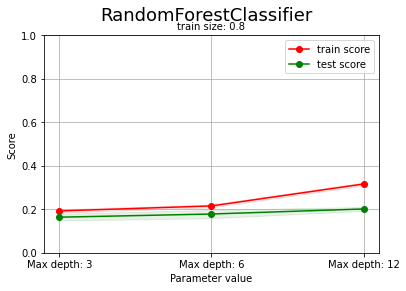

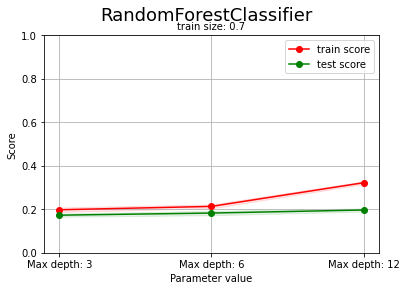

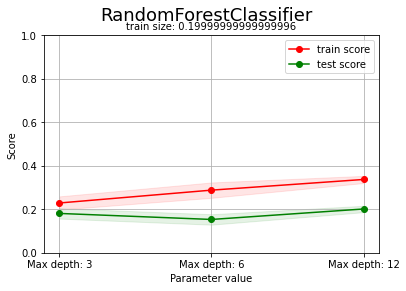

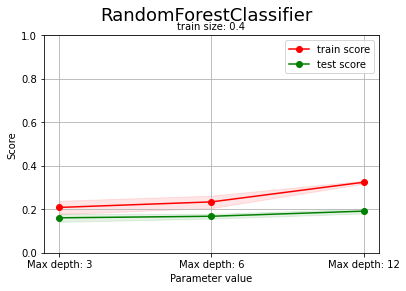

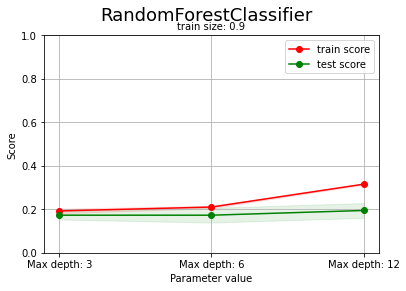

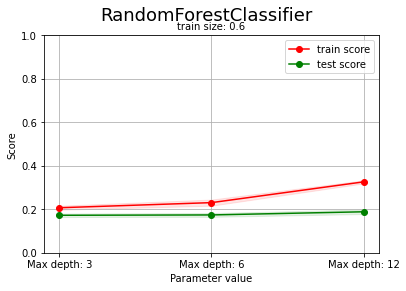

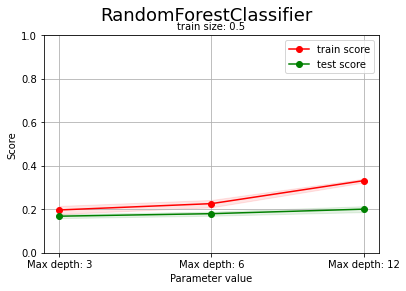

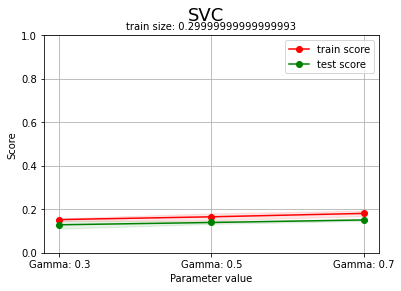

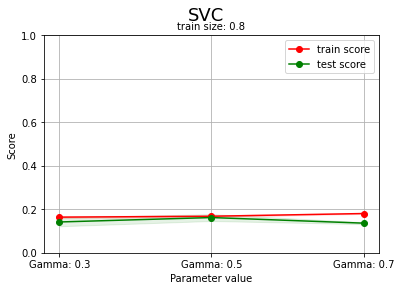

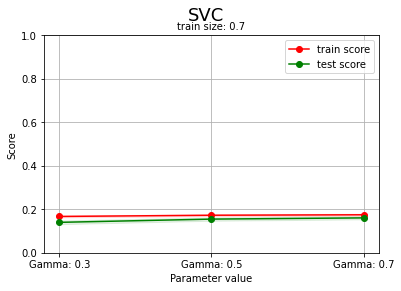

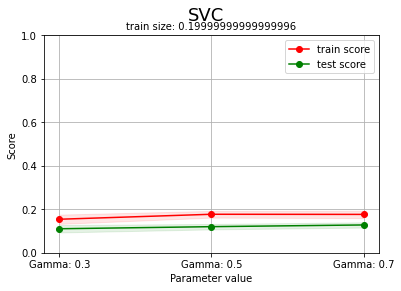

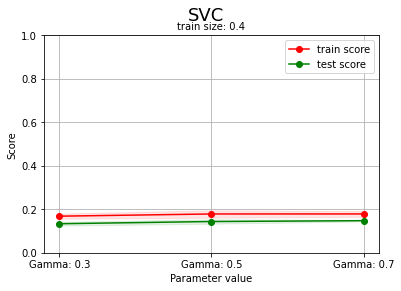

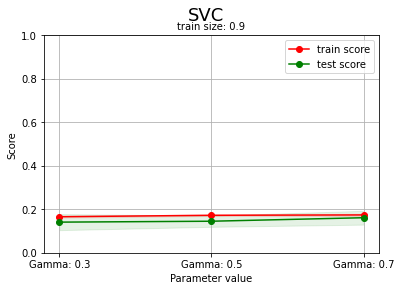

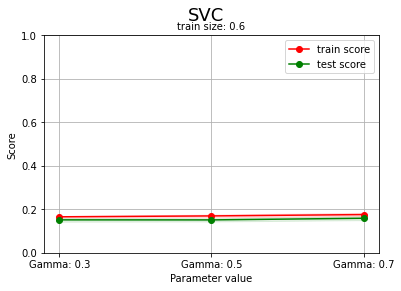

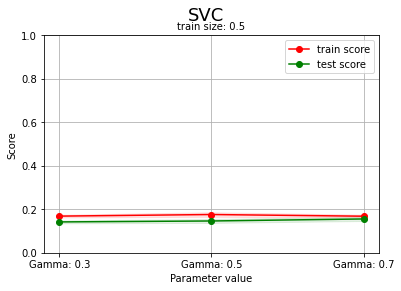

In [ ]:
d = df[df.clean == 3]
d = d[d.encodding == 'bow_pca']
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

In [ ]:
d1 = df[df.encodding == "bow"]
d1 = d1[np.isnan(d1.mean_ts) == False]
d2 = df[df.encodding == "bow_pca"]
d2 = d2[np.isnan(d2.mean_ts) == False]
d3 = df[df.encodding == "embedding"]
d3 = d3[np.isnan(d3.mean_ts) == False]

print("BEST PERFORMACE  bow_sms1: %s bow_sms2: %s bow_sms3: %s" % (max(d1['mean_ts'][d1['clean'] == 1]),
                                                         max(d1['mean_ts'][d1['clean'] == 2]),
                                                         max(d1['mean_ts'][d1['clean'] == 3])))
print("BIAS             bow_sms1: %s bow_sms2: %s bow_sms3: %s" % (max(d1['bias'][d1['clean'] == 1]),
                                                         max(d1['bias'][d1['clean'] == 2]),
                                                         max(d1['bias'][d1['clean'] == 3])))
print()
print("BEST PERFORMACE  pca_sms1: %s pca_sms2: %s pca_sms3: %s" % (max(d2['mean_ts'][d2['clean'] == 1]),
                                                         max(d2['mean_ts'][d2['clean'] == 2]),
                                                         max(d2['mean_ts'][d2['clean'] == 3])))
print("BIAS             pca_sms1: %s pca_sms2: %s pca_sms3: %s" % (max(d2['bias'][d2['clean'] == 1]),
                                                         max(d2['bias'][d2['clean'] == 2]),
                                                         max(d2['bias'][d2['clean'] == 3])))
print()
print("BEST PERFORMACE  embedding1: %s embedding2: %s embedding3: %s" % (max(d3['mean_ts'][d3['clean'] == 1]),
                                                         max(d3['mean_ts'][d3['clean'] == 2]),
                                                         max(d3['mean_ts'][d3['clean'] == 3])))
print("BIAS             embedding1: %s embedding2: %s embedding3: %s" % (max(d3['bias'][d3['clean'] == 1]),
                                                         max(d3['bias'][d3['clean'] == 2]),
                                                         max(d3['bias'][d3['clean'] == 3])))
print()
print("MEAN PERFORMACE  bow_sms1: %s bow_sms2: %s bow_sms3: %s" % (np.mean(d1['mean_ts'][d1['clean'] == 1]),
                                                         np.mean(d1['mean_ts'][d1['clean'] == 2]),
                                                         np.mean(d1['mean_ts'][d1['clean'] == 3])))
print("BIAS             bow_sms1: %s bow_sms2: %s bow_sms3: %s" % (np.mean(d1['bias'][d1['clean'] == 1]),
                                                         np.mean(d1['bias'][d1['clean'] == 2]),
                                                         np.mean(d1['bias'][d1['clean'] == 3])))
print()
print("MEAN PERFORMACE  pca_sms1: %s pca_sms2: %s pca_sms3: %s" % (np.mean(d2['mean_ts'][d2['clean'] == 1]),
                                                         np.mean(d2['mean_ts'][d2['clean'] == 2]),
                                                         np.mean(d2['mean_ts'][d2['clean'] == 3])))
print("BIAS             pca_sms1: %s pca_sms2: %s pca_sms3: %s" % (np.mean(d2['bias'][d2['clean'] == 1]),
                                                         np.mean(d2['bias'][d2['clean'] == 2]),
                                                         np.mean(d2['bias'][d2['clean'] == 3])))
print()
print("MEAN PERFORMACE  0.561: %s embedding2: %s embedding3: %s" % (np.mean(d3['mean_ts'][d3['clean'] == 1]),
                                                         np.mean(d3['mean_ts'][d3['clean'] == 2]),
                                                         np.mean(d3['mean_ts'][d3['clean'] == 3])))
print("BIAS             embedding1: %s embedding2: %s embedding3: %s" % (np.mean(d3['bias'][d3['clean'] == 1]),
                                                         np.mean(d3['bias'][d3['clean'] == 2]),
                                                         np.mean(d3['bias'][d3['clean'] == 3])))


BEST PERFORMACE  bow_sms1: 0.5075631914624041 bow_sms2: 0.7014699643342768 bow_sms3: 0.1846977486943472
BIAS             bow_sms1: 0.7749008328081892 bow_sms2: 0.8291919051599348 bow_sms3: 0.2092573134614083

BEST PERFORMACE  pca_sms1: 0.6205507661165556 pca_sms2: 0.6827399210226325 pca_sms3: 0.20162858486118992
BIAS             pca_sms1: 0.5245957860495514 pca_sms2: 0.3037448505084973 pca_sms3: 0.15057869464102464

BEST PERFORMACE  embedding1: 0.7784008947668714 embedding2: 0.7557146570172006 embedding3: 0.5879194889196476
BIAS             embedding1: 0.27975272930042616 embedding2: 0.30070954654688375 embedding3: 0.2410434180873703

MEAN PERFORMACE  bow_sms1: 0.26224815789241634 bow_sms2: 0.3277264114996018 bow_sms3: 0.11402040495254609
BIAS             bow_sms1: 0.36450670413121866 bow_sms2: 0.27468809729240445 bow_sms3: 0.09366750820592121

MEAN PERFORMACE  pca_sms1: 0.528622403725549 pca_sms2: 0.6430819300920954 pca_sms3: 0.1619362266048233
BIAS             pca_sms1: 0.26447778953

In [ ]:
d1 = df[df.model == "RandomForestClassifier"]
d1 = d1[np.isnan(d1.mean_ts) == False]
d2 = df[df.model== "SVC"]
d2 = d2[np.isnan(d2.mean_ts) == False]

print("RandomForestClassifier")
print("BEST PERFORMACE  sms1: %s sms2: %s sms3: %s" % (max(d1['mean_ts'][d1['clean'] == 1]),
                                                         max(d1['mean_ts'][d1['clean'] == 2]),
                                                         max(d1['mean_ts'][d1['clean'] == 3])))
print("BIAS             sms1: %s sms2: %s sms3: %s" % (max(d1['bias'][d1['clean'] == 1]),
                                                         max(d1['bias'][d1['clean'] == 2]),
                                                         max(d1['bias'][d1['clean'] == 3])))
print()
print("MEAN PERFORMACE  sms1: %s sms2: %s sms3: %s" % (np.mean(d1['mean_ts'][d1['clean'] == 1]),
                                                         np.mean(d1['mean_ts'][d1['clean'] == 2]),
                                                         np.mean(d1['mean_ts'][d1['clean'] == 3])))
print("BIAS             sms1: %s sms2: %s sms3: %s" % (np.mean(d1['bias'][d1['clean'] == 1]),
                                                         np.mean(d1['bias'][d1['clean'] == 2]),
                                                         np.mean(d1['bias'][d1['clean'] == 3])))
print()
print("SVC")
print("BEST PERFORMACE  sms1: %s sms2: %s sms3: %s" % (max(d2['mean_ts'][d2['clean'] == 1]),
                                                         max(d2['mean_ts'][d2['clean'] == 2]),
                                                         max(d2['mean_ts'][d2['clean'] == 3])))
print("BIAS             sms1: %s sms2: %s sms3: %s" % (max(d2['bias'][d2['clean'] == 1]),
                                                         max(d2['bias'][d2['clean'] == 2]),
                                                         max(d2['bias'][d2['clean'] == 3])))
print()
print("MEAN PERFORMACE  sms1: %s sms2: %s sms3: %s" % (np.mean(d2['mean_ts'][d2['clean'] == 1]),
                                                         np.mean(d2['mean_ts'][d2['clean'] == 2]),
                                                         np.mean(d2['mean_ts'][d2['clean'] == 3])))
print("BIAS             sms1: %s sms2: %s sms3: %s" % (np.mean(d2['bias'][d2['clean'] == 1]),
                                                         np.mean(d2['bias'][d2['clean'] == 2]),
                                                         np.mean(d2['bias'][d2['clean'] == 3])))


print()
print("ENCODING PERFORMANCE")
print()

print("RandomForestClassifier")
print("BEST PERFORMACE  bow: %s bow_pca: %s embedding: %s" % (max(d1['mean_ts'][d1['encodding'] == "bow"]),
                                                         max(d1['mean_ts'][d1['encodding'] == "bow_pca"]),
                                                         max(d1['mean_ts'][d1['encodding'] == "embedding"])))
print("BIAS             bow: %s bow_pca: %s embedding: %s" % (max(d1['bias'][d1['encodding'] == "bow"]),
                                                         max(d1['bias'][d1['encodding'] == "bow_pca"]),
                                                         max(d1['bias'][d1['encodding'] == "embedding"])))
print()
print("MEAN PERFORMACE  bow: %s bow_pca: %s embedding: %s" % (np.mean(d1['mean_ts'][d1['encodding'] == "bow"]),
                                                         np.mean(d1['mean_ts'][d1['encodding'] == "bow_pca"]),
                                                         np.mean(d1['mean_ts'][d1['encodding'] == "embedding"])))
print("BIAS             bow: %s bow_pca: %s embedding: %s" % (np.mean(d1['bias'][d1['encodding'] == "bow"]),
                                                         np.mean(d1['bias'][d1['encodding'] == "bow_pca"]),
                                                         np.mean(d1['bias'][d1['encodding'] == "embedding"])))
print()
print("SVC")
print("BEST PERFORMACE  bow: %s bow_pca: %s embedding: %s" % (max(d2['mean_ts'][d2['encodding'] == "bow"]),
                                                         max(d2['mean_ts'][d2['encodding'] == "bow_pca"]),
                                                         max(d2['mean_ts'][d2['encodding'] == "embedding"])))
print("BIAS             bow: %s bow_pca: %s embedding: %s" % (max(d2['bias'][d2['encodding'] == "bow"]),
                                                         max(d2['bias'][d2['encodding'] == "bow_pca"]),
                                                         max(d2['bias'][d2['encodding'] == "embedding"])))
print()
print("MEAN PERFORMACE  bow: %s bow_pca: %s embedding: %s" % (np.mean(d2['mean_ts'][d2['encodding'] == "bow"]),
                                                         np.mean(d2['mean_ts'][d2['encodding'] == "bow_pca"]),
                                                         np.mean(d2['mean_ts'][d2['encodding'] == "embedding"])))
print("BIAS             bow: %s bow_pca: %s embedding: %s" % (np.mean(d2['bias'][d2['encodding'] == "bow"]),
                                                         np.mean(d2['bias'][d2['encodding'] == "bow_pca"]),
                                                         np.mean(d2['bias'][d2['encodding'] == "embedding"])))

RandomForestClassifier
BEST PERFORMACE  sms1: 0.7463273437784517 sms2: 0.7342129699925068 sms3: 0.5756747148586501
BIAS             sms1: 0.4073447471924946 sms2: 0.3037448505084973 sms3: 0.2410434180873703

MEAN PERFORMACE  sms1: 0.47358802224660757 sms2: 0.49826164582368015 sms3: 0.282650189004882
BIAS             sms1: 0.12301253949707096 sms2: 0.11456110432876648 sms3: 0.07966294517809536

SVC
BEST PERFORMACE  sms1: 0.7784008947668714 sms2: 0.7557146570172006 sms3: 0.5879194889196476
BIAS             sms1: 0.7749008328081892 sms2: 0.8291919051599348 sms3: 0.2092573134614083

MEAN PERFORMACE  sms1: 0.5457776792574949 sms2: 0.6287641753526695 sms3: 0.26229064829981613
BIAS             sms1: 0.358162634465398 sms2: 0.21600577585681524 sms3: 0.07351182952720871

ENCODING PERFORMANCE

RandomForestClassifier
BEST PERFORMACE  bow: 0.3594871626693739 bow_pca: 0.6827399210226325 embedding: 0.7463273437784517
BIAS             bow: 0.12620569911853105 bow_pca: 0.4073447471924946 embedding: 0.

In [ ]:
!pip install pandas plotnine
from plotnine import *

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 46 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


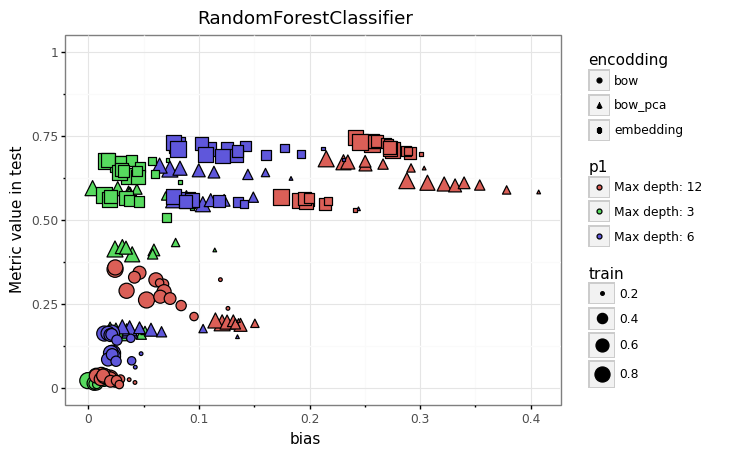

<ggplot: (8743740255194)>

In [ ]:
d1 = df[df["model"]== "RandomForestClassifier"]
ggplot(d1, aes(x='bias', y='mean_ts', shape = 'encodding', fill = "p1", size = "train")) + geom_point() + theme_bw() + ggtitle ("Random Forest Classifier") + labs(y = "Metric value in test")+ ylim(0,1)

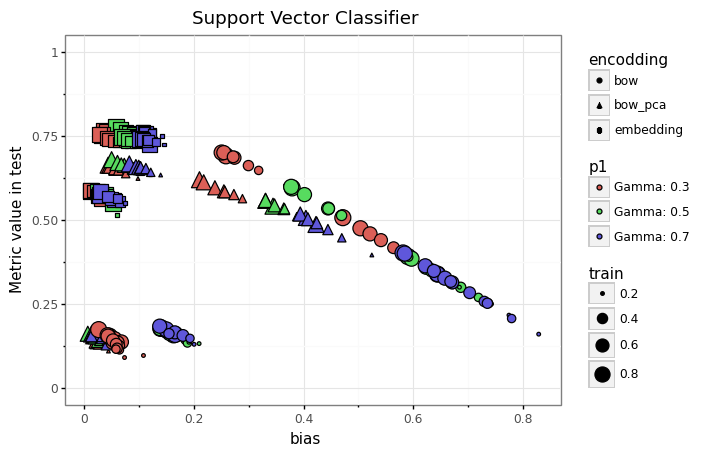

<ggplot: (8743743263124)>

In [ ]:
d1 = df[df["model"]== "SVC"]
ggplot(d1, aes(x='bias', y='mean_ts', shape = 'encodding', fill = "p1", size = "train")) + geom_point() + theme_bw() + ggtitle ("Support Vector Classifier") + labs(y = "Metric value in test") + ylim(0,1)

# Unsupervised algorithm (Clustering)

In [ ]:
from sklearn.cluster import KMeans
z = Z.numpy()
y = train.target
km = KMeans(n_clusters=2, random_state=0)
km.fit(z)
yl = km.predict(z)
metric(z, y, estimator= km)

0.2020456333595594

In [ ]:
clf = RandomForestClassifier(max_depth=12, random_state=0)
svc = SVC(gamma=0.5)
esti = [clf, svc]
ts_ppt = np.arange(.1, .31, .1)

for i in range(2,6):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(z)
  yc = km.predict(z)
  cl = 'embedding + km ' + str(i)
  #Analisis with emb edding and sms
  data = learning_dt(enc = cl, clean = 1, data = data, estimators = esti, X=z, y=y, yc=yc, test_size=ts_ppt, scoring=metric, iters = 5, train_sizes=None)

with open("../data/modelos.pkl", 'wb') as f:
    pickle.dump(data, f)


In [ ]:
with open("../data/modelos.pkl", 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df["bias"] = df.mean_tr - df.mean_ts

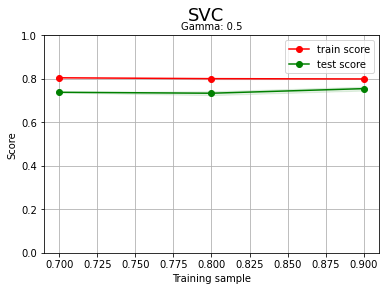

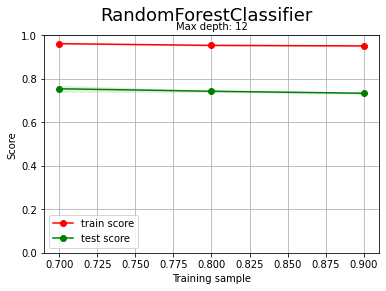

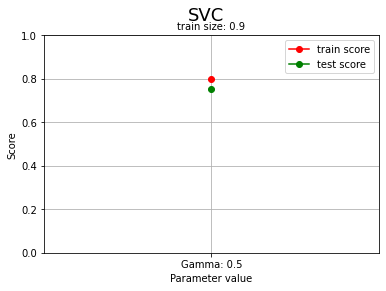

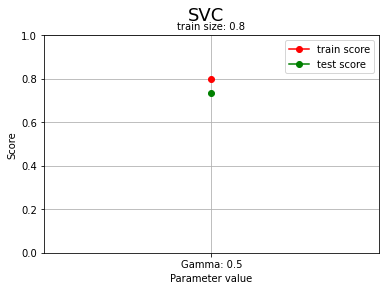

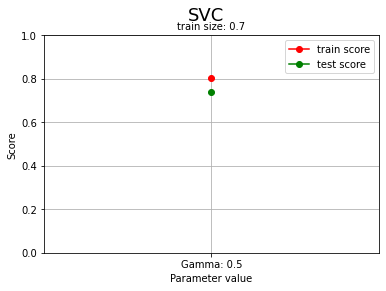

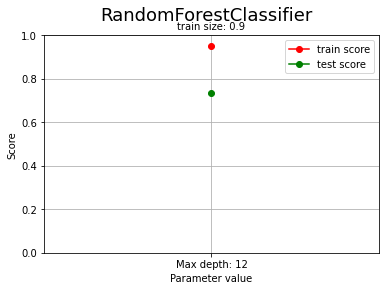

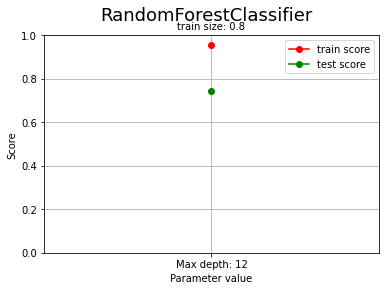

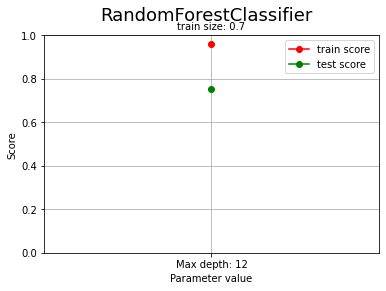

In [ ]:
d = df[df["encodding"] == "embedding + km 2"]
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

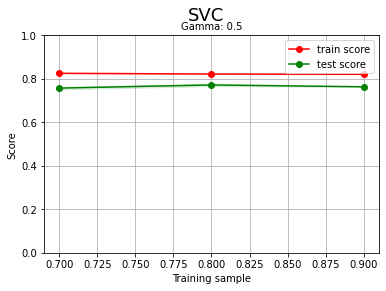

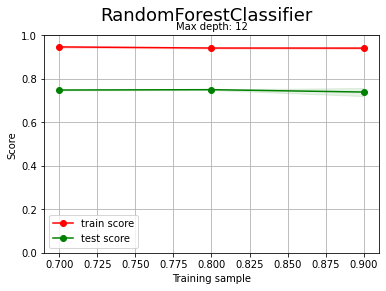

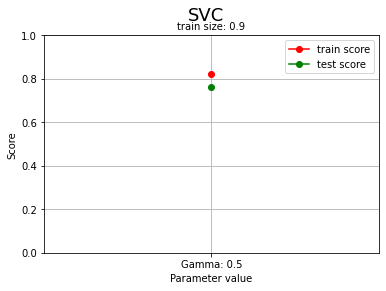

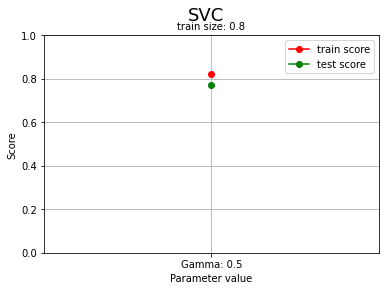

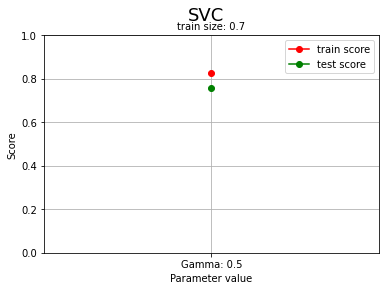

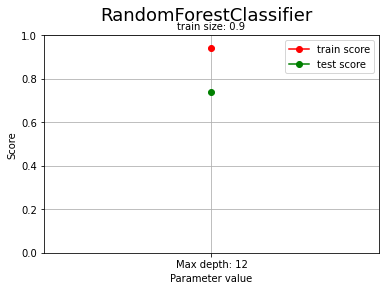

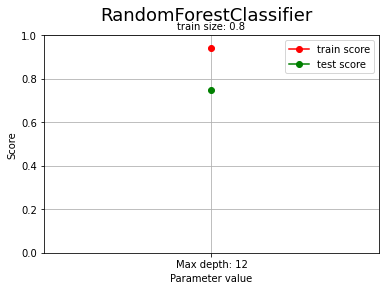

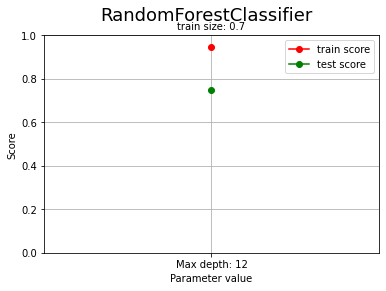

In [ ]:
d = df[df["encodding"] == "embedding + km 3"]
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

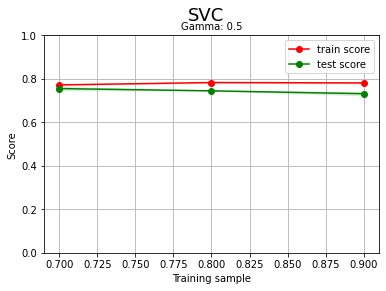

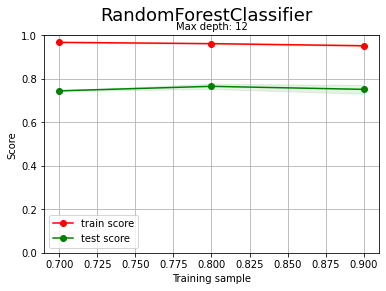

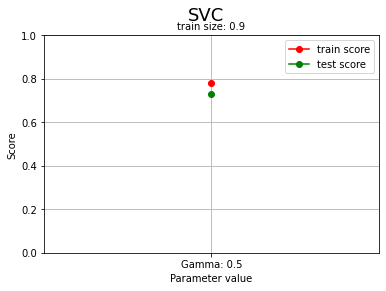

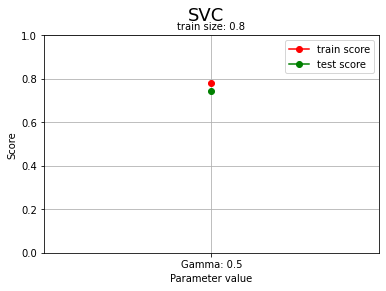

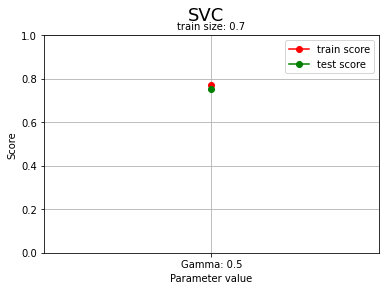

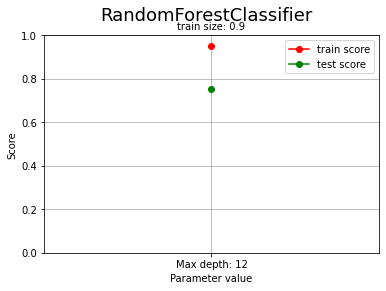

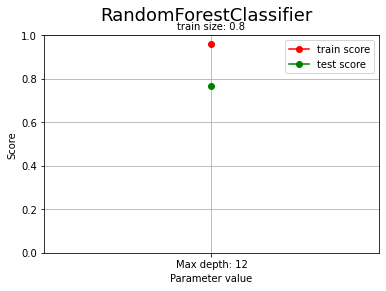

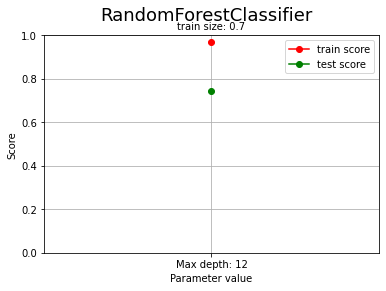

In [ ]:
d = df[df["encodding"] == "embedding + km 4"]
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

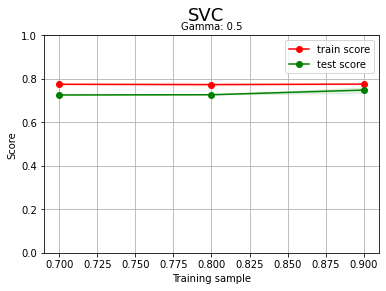

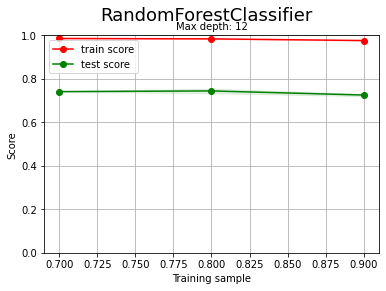

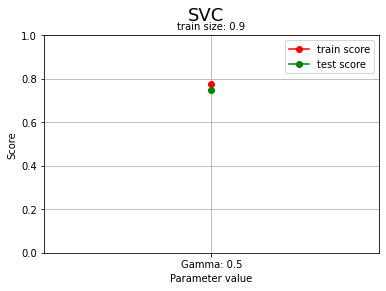

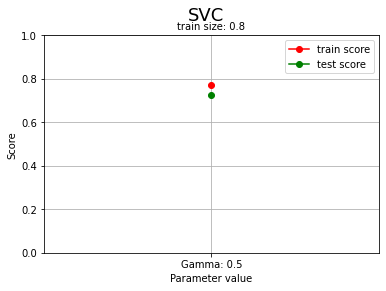

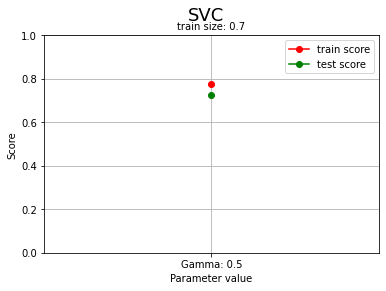

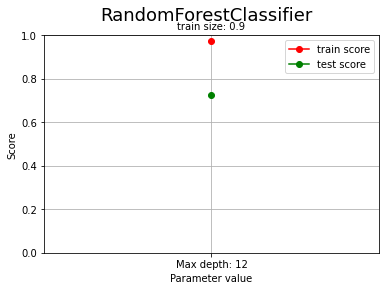

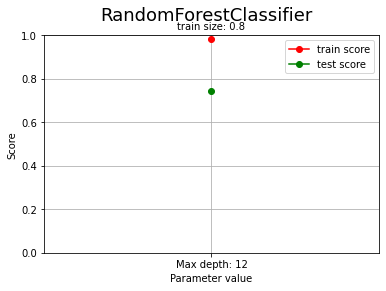

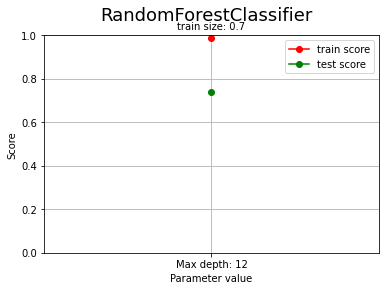

In [ ]:
d = df[df["encodding"] == "embedding + km 5"]
tweet.plot_size_efect(d)
tweet.plot_parameter_efect(d)

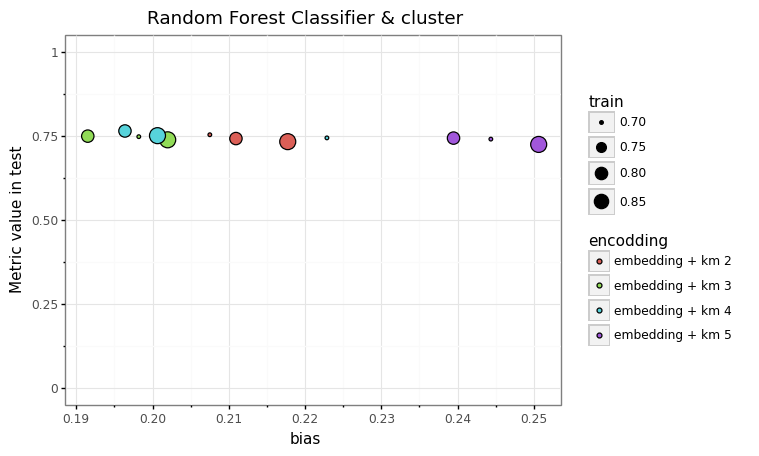

<ggplot: (8737431205682)>

In [ ]:
from plotnine import *
d1 = df[df["model"]== "RandomForestClassifier"]
d1 = d1[d1["encodding"] != "bow"]
d1 = d1[d1["encodding"] != "bow_pca"]
d1 = d1[d1["encodding"] != "embedding"]
ggplot(d1, aes(x='bias', y='mean_ts', size = 'train', fill = "encodding")) + geom_point() + theme_bw() + ggtitle ("Random Forest Classifier & cluster") + labs(y = "Metric value in test") + ylim(0,1)

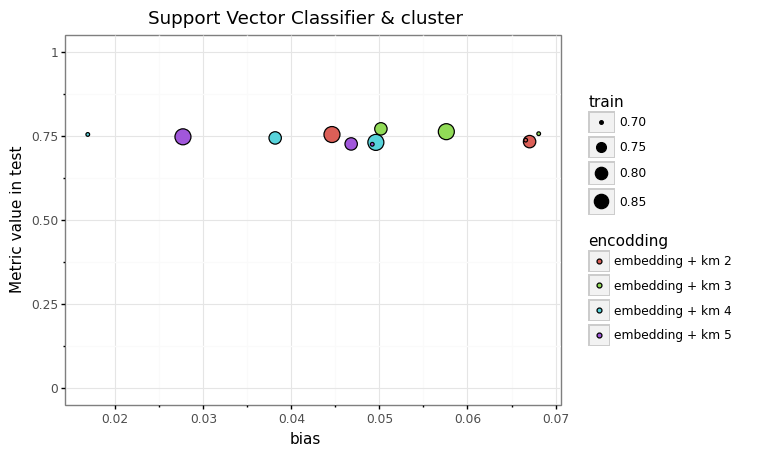

<ggplot: (-9223363299423628137)>

In [ ]:
from plotnine import *
d1 = df[df["model"]== "SVC"]
d1 = d1[d1["encodding"] != "bow"]
d1 = d1[d1["encodding"] != "bow_pca"]
d1 = d1[d1["encodding"] != "embedding"]
ggplot(d1, aes(x='bias', y='mean_ts', size = 'train', fill = "encodding")) + geom_point() + theme_bw() + ggtitle ("Support Vector Classifier & cluster") + labs(y = "Metric value in test") + ylim(0,1)

In [ ]:
d = df[df["encodding"] != "bow"]
d = d[d["encodding"] != "bow_pca"]
d = d[d["encodding"] != "embedding"]
d = d[np.isnan(d["mean_ts"]) ==False]
d[d["mean_ts"] == max(d["mean_ts"])]

model                                          estimator  ...  clean      bias
489   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...      1  0.050167

[1 rows x 11 columns]

In [ ]:
d = df[np.isnan(df["mean_ts"]) ==False]
d[d["mean_ts"] == max(d["mean_ts"])]

model                                          estimator  ...  clean     bias
80   SVC  SVC(C=1.0, break_ties=False, cache_size=200, c...  ...      1  0.05712

[1 rows x 11 columns]